### author by yangshichen
### 注意：脚本仅供参考，使用前请仔细阅读

### 加载R包

In [1]:
library(Seurat)
library(ggplot2)
library(future)
library(tidyverse)
library(harmony)
library(SeuratDisk)
library(pheatmap)
library(ggpubr)
library(ggchicklet)
library(ggsci)
library(magrittr)
library(ggh4x)
library(rstatix)
library(ggsignif)
library(ggnewscale)
library(patchwork)
library(gapminder)
library(ggprism)
library(dplyr)
library(ggplotify)

Attaching SeuratObject

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
载入需要的程序包：Rcpp

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat


载入程序包：‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



载入程序包：‘rstatix’


The following object is masked from ‘package:stats’:

    filter




### Infalmmatory Module

In [2]:
mytheme <- theme_prism(base_family="",base_fontface="plain") +
  theme(strip.text = element_text(size = 8,angle=10,vjust = 0.5,hjust = 0.5),
        axis.line = element_line(color = "black",size = 0.2),
        axis.ticks = element_line(size = 0.2),
        axis.text.y = element_text(color = "black",size = 6),
        axis.text.x = element_text(color = "black",size = 6),
        axis.title = element_text(color = "black",size = 10),
        legend.position = "none")

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


In [11]:
data <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/PathwayScore/数据导出/CD4/CD4-Inflammatory Module.csv",check.names = F,header = T))
data

sample,stage,celltype_L3,Inflammatory Module
<chr>,<chr>,<chr>,<dbl>
HD-H134,HDs,CD4_Treg-FOXP3,0.157666940
HD-H134,HDs,CD4_Naive_T-CCR7,0.050298019
HD-H134,HDs,CD4_Treg-FOXP3,0.221719563
HD-H134,HDs,CD4_Tcm-CXCR5,0.080774846
HD-H134,HDs,CD4_Th22-CCR10,0.149018532
HD-H134,HDs,CD4_Naive_T-CCR7,0.074693565
HD-H134,HDs,CD4_Naive_T-CCR7,0.109245549
HD-H134,HDs,CD4_Treg-FOXP3,0.139446747
HD-H134,HDs,CD4_Th1-GZMK,0.224878740


In [12]:
#data$stage[data$stage %in% c("HDs", "IRs")] <- "Ctrl"
colnames(data)[4] <- 'Inflammatory_Module'
data$sample <- paste0(data$stage,"_",data$sample)
data

sample,stage,celltype_L3,Inflammatory_Module
<chr>,<chr>,<chr>,<dbl>
HDs_HD-H134,HDs,CD4_Treg-FOXP3,0.157666940
HDs_HD-H134,HDs,CD4_Naive_T-CCR7,0.050298019
HDs_HD-H134,HDs,CD4_Treg-FOXP3,0.221719563
HDs_HD-H134,HDs,CD4_Tcm-CXCR5,0.080774846
HDs_HD-H134,HDs,CD4_Th22-CCR10,0.149018532
HDs_HD-H134,HDs,CD4_Naive_T-CCR7,0.074693565
HDs_HD-H134,HDs,CD4_Naive_T-CCR7,0.109245549
HDs_HD-H134,HDs,CD4_Treg-FOXP3,0.139446747
HDs_HD-H134,HDs,CD4_Th1-GZMK,0.224878740


In [13]:
df_avg <- data %>%
  group_by(sample,stage) %>%
  summarise(across(everything(), mean))
df_avg$stage <- factor(df_avg$stage, levels = c("HDs", "IRs", "INRs"))
df_avg$Inflammatory_Module <- as.numeric(df_avg$Inflammatory_Module)
df_avg

Warning message:
“There were 142 warnings in `summarise()`.
The first warning was:
ℹ In argument: `across(everything(), mean)`.
ℹ In group 1: `sample = "HDs_HD-H134"` and `stage = "HDs"`.
Caused by warning in `mean.default()`:
! 参数不是数值也不是逻辑值：返回NA
ℹ Run `dplyr::last_dplyr_warnings()` to see the 141 remaining warnings.”
`summarise()` has grouped output by 'sample'. You can override using the
`.groups` argument.


sample,stage,celltype_L3,Inflammatory_Module
<chr>,<fct>,<dbl>,<dbl>
HDs_HD-H134,HDs,NA,0.10752997
HDs_HD-H135,HDs,NA,0.13412807
HDs_HD-H136,HDs,NA,0.09509515
HDs_HD-H137,HDs,NA,0.10340044
HDs_HD-H138,HDs,NA,0.09547705
HDs_HD-H140,HDs,NA,0.12794749
HDs_HD-H141,HDs,NA,0.11489651
HDs_HD-H143,HDs,NA,0.12948813
HDs_HD-H145,HDs,NA,0.12258044


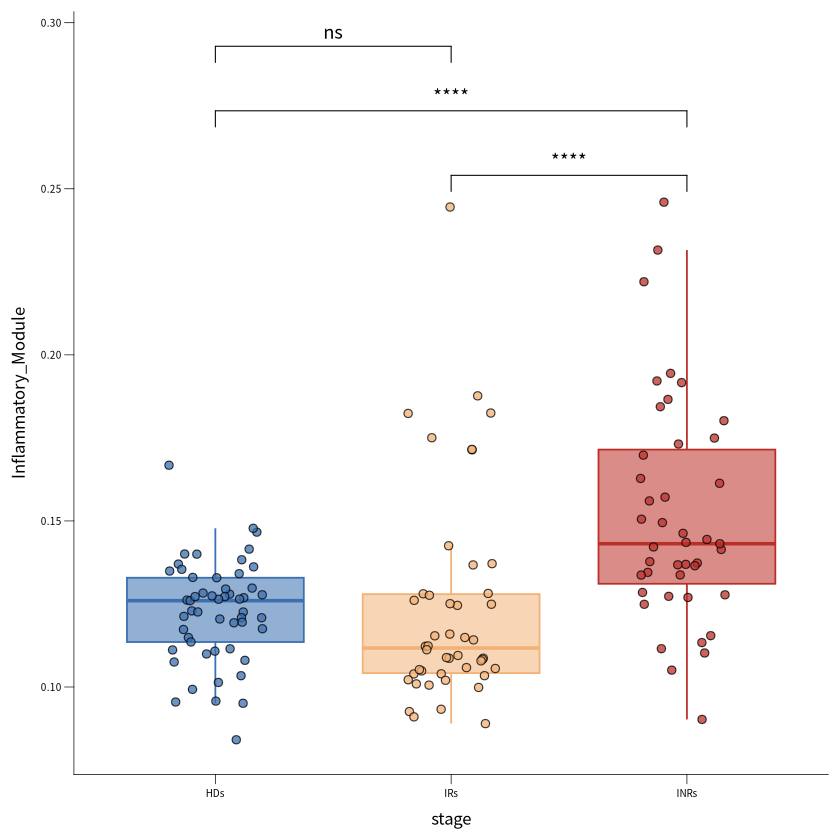

In [17]:
p <- ggplot(df_avg, aes(x = stage, y = Inflammatory_Module)) +
  geom_boxplot(aes(color = stage, fill = stage, alpha=0.25),
               position = position_dodge(width = 0.8),
               outlier.shape = NA) + 
  geom_point(aes(fill = stage), pch = 21, size = 2, alpha=0.75,
             position = position_jitter(0.2)) +
  scale_color_manual(values = c('#3A6FB0','#F2B276','#BB2F29')) + 
  scale_fill_manual(values = c('#3A6FB0','#F2B276','#BB2F29')) +
  mytheme +
  # 直接加显著性
  stat_compare_means(method = "wilcox.test", 
                     comparisons = list(c("IRs", "INRs"),c("HDs", "INRs"),c("HDs", "IRs")),
                     label = "p.signif",
                     hide.ns = F)

p

In [19]:
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/PathwayScore/p1.pdf",p,width=4,height=4)

In [59]:
df_avg <- data %>%
  group_by(sample,stage,celltype_L3) %>%
  summarise(across(everything(), mean))
df_avg$stage <- factor(df_avg$stage, levels = c("HDs", "IRs", "INRs"))
df_avg$Inflammatory_Module <- as.numeric(df_avg$Inflammatory_Module)
#df_avg <- subset(df_avg, celltype_L3 %in% c('CD4_Naive_T-CCR7','CD4_Tcm-GPR183','CD4_Tcm-IFIT3','CD4_Th1-GZMK','CD4_Th17-RORC','CD4_Th22-CCR10','CD4_Treg-FCRL3','CD4_Treg-FOXP3'))
df_avg

`summarise()` has grouped output by 'sample', 'stage'. You can override using
the `.groups` argument.


sample,stage,celltype_L3,Inflammatory_Module
<chr>,<fct>,<chr>,<dbl>
HDs_HD-H134,HDs,CD4_Naive_T-CCR7,0.08610446
HDs_HD-H134,HDs,CD4_Naive_T-SOX4,0.07177877
HDs_HD-H134,HDs,CD4_Tcm-CXCR5,0.09766630
HDs_HD-H134,HDs,CD4_Tcm-GPR183,0.11723778
HDs_HD-H134,HDs,CD4_Tcm-IFIT3,0.14357415
HDs_HD-H134,HDs,CD4_Tcm-SOX4,0.09774666
HDs_HD-H134,HDs,CD4_Tem-CCR7neg,0.11469823
HDs_HD-H134,HDs,CD4_Tfh_like-CXCR5,0.13189161
HDs_HD-H134,HDs,CD4_Th-TNFRSF11A,0.13891245


In [60]:
global_mean <- mean(df_avg$Inflammatory_Module, na.rm = TRUE)
global_mean

[1] 0.1443063

In [61]:
# 对每个 celltype 做比较
res <- df_avg %>%
  group_by(celltype_L3) %>%
  summarise(
    celltype_mean = mean(Inflammatory_Module, na.rm = TRUE),
    n = n(),
    # log2FC
    log2FC = log2((celltype_mean) / (global_mean)),
    # t 检验：该 celltype vs 全部
    p_value = wilcox.test(Inflammatory_Module, mu = global_mean)$p.value
  ) %>%
  mutate(adj_p_value = p.adjust(p_value, method = "BH"))  # 多重检验校正
res

celltype_L3,celltype_mean,n,log2FC,p_value,adj_p_value
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
CD4_Naive_T-CCR7,0.10170533,142,-0.50473857,5.715858e-24,3.959970e-23
CD4_Naive_T-SOX4,0.08662294,142,-0.73631284,4.898295e-25,6.857613e-24
CD4_Tcm-CXCR5,0.11698714,142,-0.30278385,1.979669e-21,5.543073e-21
CD4_Tcm-GPR183,0.12909898,142,-0.16065628,3.163346e-10,3.690570e-10
CD4_Tcm-IFIT3,0.17657923,142,0.29118180,2.000010e-19,4.666690e-19
CD4_Tcm-SOX4,0.13038263,142,-0.14638221,2.996361e-07,3.226850e-07
CD4_Tem-CCR7neg,0.12112363,142,-0.25265352,1.553060e-15,2.415871e-15
CD4_Tfh_like-CXCR5,0.15222135,142,0.07703684,2.469183e-02,2.469183e-02
CD4_Th-TNFRSF11A,0.17232681,142,0.25601335,1.837152e-18,3.674304e-18


In [62]:
mat <- as.matrix(res$log2FC)
rownames(mat) <- res$celltype_L3
colnames(mat) <- "Inflammatory_Module"

stars <- ifelse(res$adj_p_value < 0.001, "***",
         ifelse(res$adj_p_value < 0.01, "**",
         ifelse(res$adj_p_value < 0.05, "*", "")))
stars_mat <- matrix(stars, ncol = 1)
rownames(stars_mat) <- res$celltype_L3
colnames(stars_mat) <- "Inflammatory_Module"

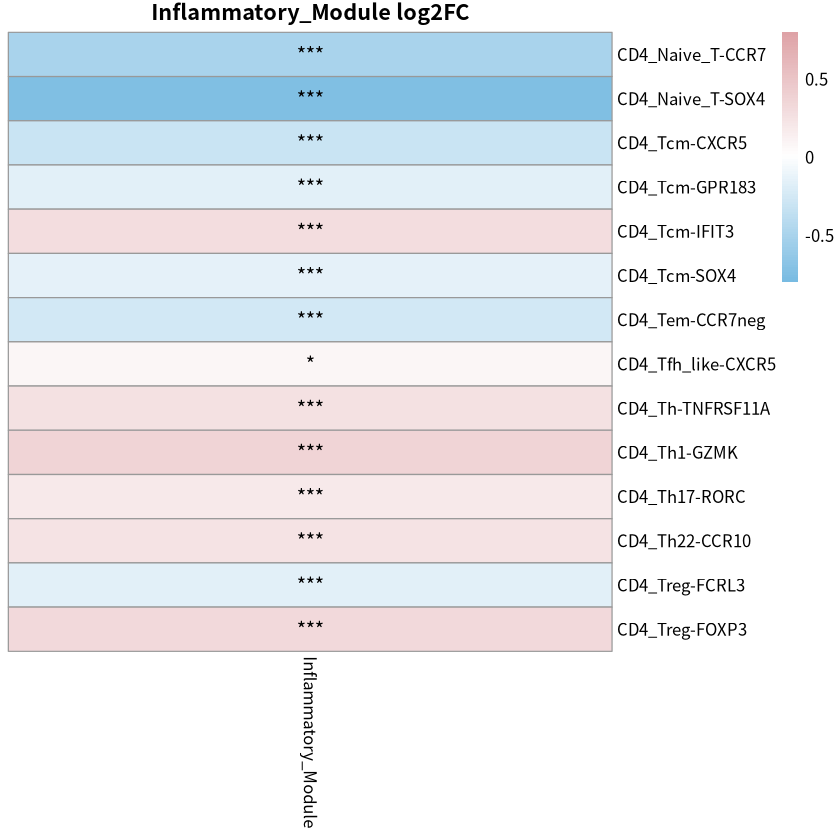

In [65]:
p <- pheatmap(
  mat,
  cluster_rows = F,
  cluster_cols = F,
    breaks=seq(-0.8,0.8,length.out = 100),
  color = colorRampPalette(c("#78BBE2","white","#DEA1A5"))(100),
  display_numbers = stars_mat,   # 显著性星号
  number_color = "black",        # 星号颜色
  fontsize_number = 12,          # 星号大小
  main = "Inflammatory_Module log2FC"
)
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/PathwayScore/p2.pdf",p,width=20,height=3)

In [67]:
res <- df_avg %>%
  group_by(celltype_L3) %>%
  summarise(
    # INRs vs HDs
    log2FC_INRvsHD = log2(
      (mean(Inflammatory_Module[stage == "INRs"], na.rm = TRUE)) /
      (mean(Inflammatory_Module[stage == "HDs"], na.rm = TRUE))
    ),
    pval_INRvsHD = tryCatch(
      wilcox.test(
        Inflammatory_Module[stage == "INRs"],
        Inflammatory_Module[stage == "HDs"]
      )$p.value,
      error = function(e) NA
    ),

    # IRs vs HDs
    log2FC_IRvsHD = log2(
      (mean(Inflammatory_Module[stage == "IRs"], na.rm = TRUE)) /
      (mean(Inflammatory_Module[stage == "HDs"], na.rm = TRUE))
    ),
    pval_IRvsHD = tryCatch(
      wilcox.test(
        Inflammatory_Module[stage == "IRs"],
        Inflammatory_Module[stage == "HDs"]
      )$p.value,
      error = function(e) NA
    ),
    .groups = "drop"
  ) %>%
  mutate(
    pval_adj_INRvsHD = p.adjust(pval_INRvsHD, method = "BH"),
    pval_adj_IRvsHD  = p.adjust(pval_IRvsHD, method = "BH")
  )
res

celltype_L3,log2FC_INRvsHD,pval_INRvsHD,log2FC_IRvsHD,pval_IRvsHD,pval_adj_INRvsHD,pval_adj_IRvsHD
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CD4_Naive_T-CCR7,0.2185383,5.645683e-04,-0.01437114,0.06055762,7.185415e-04,0.2826022
CD4_Naive_T-SOX4,0.1704458,9.502268e-03,-0.05961841,0.02158135,1.108598e-02,0.2826022
CD4_Tcm-CXCR5,0.1289585,1.951395e-02,-0.02890481,0.04369274,1.951395e-02,0.2826022
CD4_Tcm-GPR183,0.2606016,1.018261e-05,0.04090303,0.10585041,2.851130e-05,0.2963811
CD4_Tcm-IFIT3,0.3217303,1.557230e-06,0.03980983,0.33823971,7.267075e-06,0.4735356
CD4_Tcm-SOX4,0.3120284,3.692584e-05,0.08002565,0.55800006,6.462022e-05,0.7101819
CD4_Tem-CCR7neg,0.2328128,3.524567e-04,0.04948972,0.09993020,4.934394e-04,0.2963811
CD4_Tfh_like-CXCR5,0.2067894,4.614418e-05,0.03446574,0.28151744,7.177983e-05,0.4379160
CD4_Th-TNFRSF11A,0.2420047,8.293447e-06,0.04416600,0.28151744,2.851130e-05,0.4379160


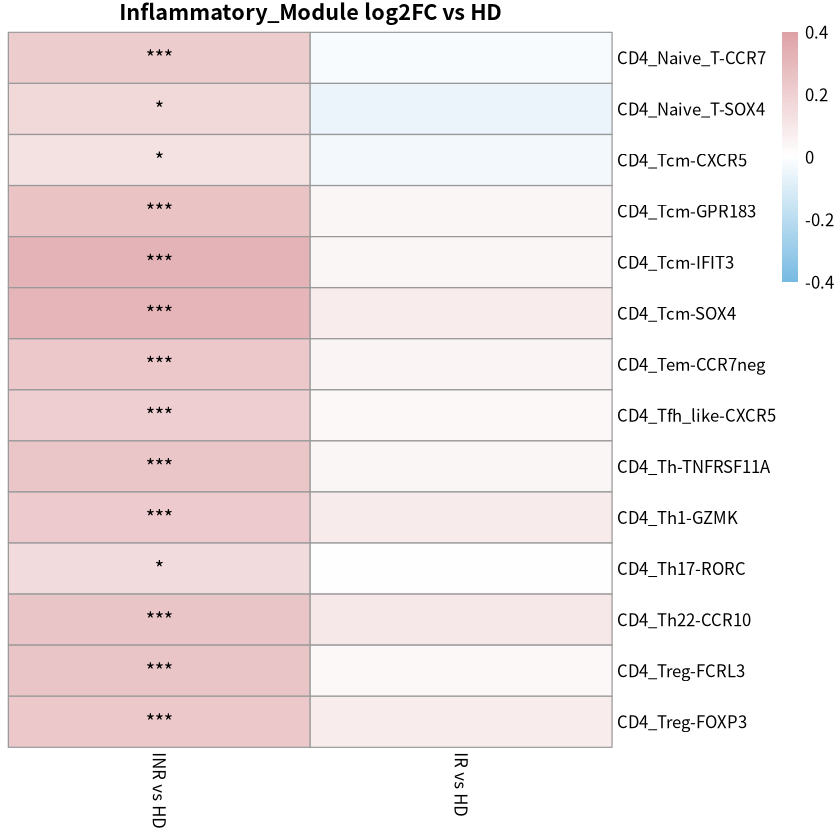

In [75]:
mat <- res %>%
  select(celltype_L3, log2FC_INRvsHD, log2FC_IRvsHD) %>%
  column_to_rownames("celltype_L3") %>%
  as.matrix()
colnames(mat) <- c("INR vs HD", "IR vs HD")

# 生成显著性星号矩阵
stars <- res %>%
  transmute(
    celltype_L3,
    INRvsHD = ifelse(pval_adj_INRvsHD < 0.001, "***",
              ifelse(pval_adj_INRvsHD < 0.01, "**",
              ifelse(pval_adj_INRvsHD < 0.05, "*", ""))),
    IRvsHD = ifelse(pval_adj_IRvsHD < 0.001, "***",
              ifelse(pval_adj_IRvsHD < 0.01, "**",
              ifelse(pval_adj_IRvsHD < 0.05, "*", "")))
  ) %>%
  column_to_rownames("celltype_L3") %>%
  as.matrix()
colnames(stars) <- c("INR vs HD", "IR vs HD")

# 画热图
p <- pheatmap(
  mat,
  cluster_rows = F,
  cluster_cols = F,
    breaks=seq(-0.4,0.4,length.out = 100),
  color = colorRampPalette(c("#78BBE2","white","#DEA1A5"))(100),
  display_numbers = stars,   # 显著性星号
  number_color = "black",
  fontsize_number = 12,
  main = "Inflammatory_Module log2FC vs HD"
)

In [76]:
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/PathwayScore/p3.pdf",p,width=20,height=3)

In [ ]:
Heatmap(
  mat,
  name = "log2FC",
  col = colorRamp2(c(min(mat), 0, max(mat)), c("blue", "white", "red")),
  cell_fun = function(j, i, x, y, width, height, fill) {
    grid.text(sig_labels[i], x, y)  # 在每个格子上画显著性星号
  }
)

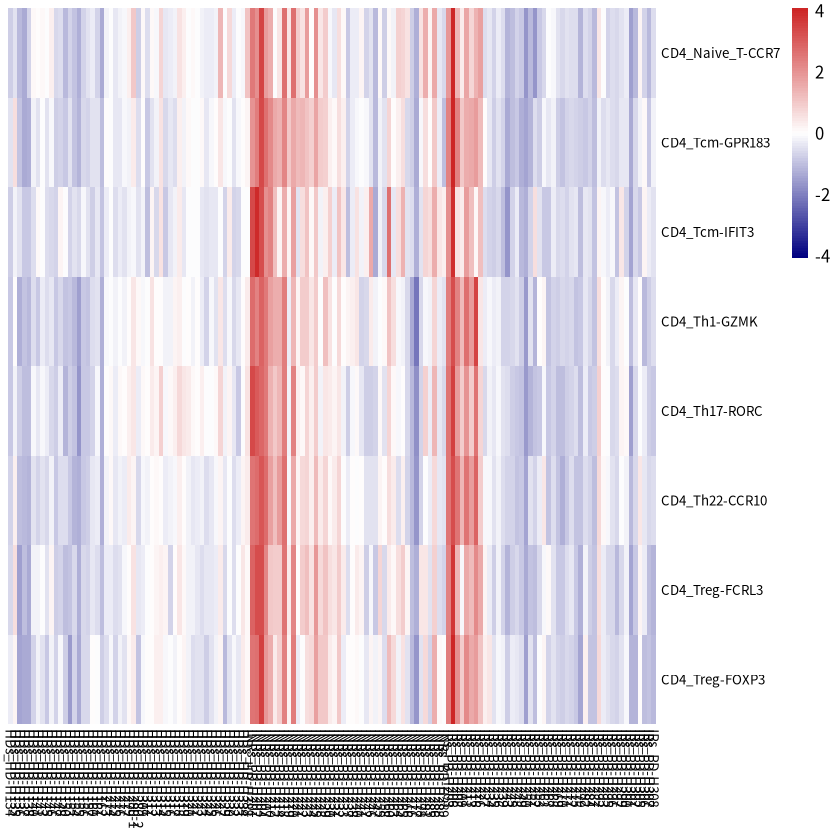

In [34]:
p <- pheatmap(mat,
         scale = "row", 
         cluster_cols = F,
         cluster_rows = F,
         show_rownames = TRUE,
         show_colnames = TRUE,
         fontsize_row = 8,
         fontsize_col = 8,
         color = colorRampPalette(c("navy", "white", "firebrick3"))(100))

In [37]:
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/PathwayScore/p2.pdf",p,width=20,height=3)

### 通路热图（样本）

#### data

In [ ]:
data <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/PathwayScore/数据导出/CD8/CD8-1010.csv",check.names = F,header = T))
data$stage <- factor(data$stage,levels = c("HDs",'IRs',"INRs"))
#data <- data[, !names(data) %in% c("NEGATIVE_REGULATION_OF_VIRAL_TRANSCRIPTION","DEFENSE_RESPONSE_TO_VIRUS","HALLMARK_IL2_STAT5_SIGNALING","TUMOR_NECROSIS_FACTOR_MEDIATED_SIGNALING_PATHWAY",
#                                  "TUMOR_NECROSIS_FACTOR_SUPERFAMILY_CYTOKINE_PRODUCTION","INTERLEUKIN_1_ALPHA_PRODUCTION")]

In [ ]:
data

In [10]:
##data
data_sub <- data[,-1]
grouped_data <- data_sub %>%
  group_by(stage, celltype_L2) %>%
  summarize(across(everything(), mean))
sort_data <- as.data.frame(grouped_data[order(grouped_data$celltype_L2), ])
rownames(sort_data) <- paste0(sort_data$celltype_L2,"_",sort_data$stage)
sort_data <- t(as.matrix(sort_data[,c(-1,-2)]))

`summarise()` has grouped output by 'stage'. You can override using the
`.groups` argument.


In [11]:
sort_data

,Aptypical Memory B_HDs,Aptypical Memory B_IRs,Aptypical Memory B_INRs,CD4 Helper T_HDs,CD4 Helper T_IRs,CD4 Helper T_INRs,CD4 Naive T_HDs,CD4 Naive T_IRs,CD4 Naive T_INRs,CD4 Tcm_HDs,⋯,Terminal NK_INRs,Transitional B_HDs,Transitional B_IRs,Transitional B_INRs,Transitional NK_HDs,Transitional NK_IRs,Transitional NK_INRs,Unswitched Memory B_HDs,Unswitched Memory B_IRs,Unswitched Memory B_INRs
GOBP_INFLAMMATORY_RESPONSE,0.02188396,0.02120583,0.02433344,0.01669036,0.01685323,0.02181456,-0.01124841,-0.01286458,-0.01008264,0.0001443938,⋯,0.0385551,-0.001907455,0.0008297468,0.004710257,0.05255373,0.04725973,0.05656229,0.00909328,0.01053817,0.01311803
GOBP_RESPONSE_TO_TYPE_II_INTERFERON,0.20526043,0.19949855,0.21301175,0.17152091,0.17379693,0.18946350,0.12459600,0.11945550,0.12792957,0.1401586196,⋯,0.2131137,0.164347793,0.1583761824,0.167754122,0.24474003,0.22939143,0.24401006,0.17547993,0.17402765,0.18130922


#### pvalue

In [12]:
subdata <- data %>%
  group_by(sample,stage,celltype_L2) %>%
  summarise(across(everything(), mean))
subdata

`summarise()` has grouped output by 'sample', 'stage'. You can override using
the `.groups` argument.


sample,stage,celltype_L2,GOBP_INFLAMMATORY_RESPONSE,GOBP_RESPONSE_TO_TYPE_II_INTERFERON
<chr>,<fct>,<chr>,<dbl>,<dbl>
HD-H134,HDs,Aptypical Memory B,0.0315426004,0.2394581
HD-H134,HDs,CD4 Helper T,0.0168081251,0.1941309
HD-H134,HDs,CD4 Naive T,-0.0104802928,0.1365467
HD-H134,HDs,CD4 Tcm,0.0046457678,0.1611784
HD-H134,HDs,CD4 Tem,0.0073967425,0.1521113
HD-H134,HDs,CD4 Treg,0.0138385474,0.1797652
HD-H134,HDs,CD56bright NK,0.0604025034,0.2322865
HD-H134,HDs,CD8 CTL,0.0278403251,0.2105010
HD-H134,HDs,CD8 Naive T,-0.0188142643,0.1328063


In [24]:
p_val <- data.frame()
for (pathway in colnames(subdata)[4:5]) {
  df_p_val <- subdata %>% group_by(celltype_L2) %>%
    wilcox_test(as.formula(paste0(pathway, " ~ stage"))) %>%
    adjust_pvalue(p.col = "p", method = "none") %>%
    add_significance(p.col = "p.adj",cutpoints = c(0,0.001, 0.01, 0.05, 1),symbols = c("***", "**", "*", "ns"))
  df_p_val <- df_p_val[,-c(5,6,7)]
  colnames(df_p_val) <- c("celltype_L2","pathway","group1","group2","p","p.adj","p.adj.signif")
  p_val <- rbind(p_val,df_p_val)
}

p_val_sub <- p_val[,-c(5,6)]
df_pivot <- spread(p_val_sub, key = pathway, value = p.adj.signif) #按照pathway分列

cols_to_replace <- c(colnames(df_pivot)[4:5]) #符号替换
df_pivot[df_pivot$group1 == "IRs" & df_pivot$group2 == "INRs", cols_to_replace] <- 
  lapply(df_pivot[df_pivot$group1 == "IRs" & df_pivot$group2 == "INRs", cols_to_replace], function(x) gsub("\\*", "+", x))
df_pivot[df_pivot$group1 == "IRs" & df_pivot$group2 == "INRs", cols_to_replace] <- 
  lapply(df_pivot[df_pivot$group1 == "IRs" & df_pivot$group2 == "INRs", cols_to_replace], function(x) gsub("\\*\\*", "++", x))
df_pivot[df_pivot$group1 == "IRs" & df_pivot$group2 == "INRs", cols_to_replace] <- 
  lapply(df_pivot[df_pivot$group1 == "IRs" & df_pivot$group2 == "INRs", cols_to_replace], function(x) gsub("\\*\\*\\*", "+++", x))

df_pivot$group <- paste0(df_pivot$group2,"_",df_pivot$group1)
df_pivot <- df_pivot[,-c(2,3)]

In [25]:
df_pivot

celltype_L2,GOBP_INFLAMMATORY_RESPONSE,GOBP_RESPONSE_TO_TYPE_II_INTERFERON,group
<chr>,<chr>,<chr>,<chr>
Aptypical Memory B,ns,ns,INRs_HDs
Aptypical Memory B,ns,*,IRs_HDs
Aptypical Memory B,+,++,INRs_IRs
CD4 Helper T,***,***,INRs_HDs
CD4 Helper T,ns,ns,IRs_HDs
CD4 Helper T,+++,+++,INRs_IRs
CD4 Naive T,ns,*,INRs_HDs
CD4 Naive T,*,ns,IRs_HDs
CD4 Naive T,++,++,INRs_IRs


In [27]:
#INRs组p
df_INRs <- df_pivot[df_pivot$group != 'IRs_HDs', ]
df_INRs <- df_INRs %>%
  group_by(celltype_L2) %>%
  summarize(group = "INRs",
            across(colnames(df_INRs)[2:3], ~paste0(.x, collapse = "\n")))

#IRs组p
df_IRs <- df_pivot[df_pivot$group == 'IRs_HDs', ]
df_IRs$group <- "IRs"

#HDs组p
df_HDs <- df_pivot[df_pivot$group == 'IRs_HDs', ]
df_HDs <- as.data.frame(lapply(df_HDs, function(x) gsub("\\*\\*\\*", "ns", x)))
df_HDs <- as.data.frame(lapply(df_HDs, function(x) gsub("\\*\\*", "ns", x)))
df_HDs <- as.data.frame(lapply(df_HDs, function(x) gsub("\\*", "ns", x)))
df_HDs$group <- "HDs"

#合并p
df <- rbind(df_HDs,df_IRs,df_INRs)
df <- as.data.frame(df[order(df$celltype_L2), ])
rownames(df) <- paste0(df$celltype_L2,"_",df$group)
df <- t(df[,-c(1,28)])
df <- df[match(rownames(sort_data), rownames(df)), ]
df[df == "ns" | df == "ns\nns"] <- ""
df[df == "***\nns"] <- "***"
df[df == "**\nns"] <- "**"
df[df == "*\nns"] <- "*"
df[df == "ns\n+"] <- "+"
df[df == "ns\n++"] <- "++"
df[df == "ns\n+++"] <- "+++"

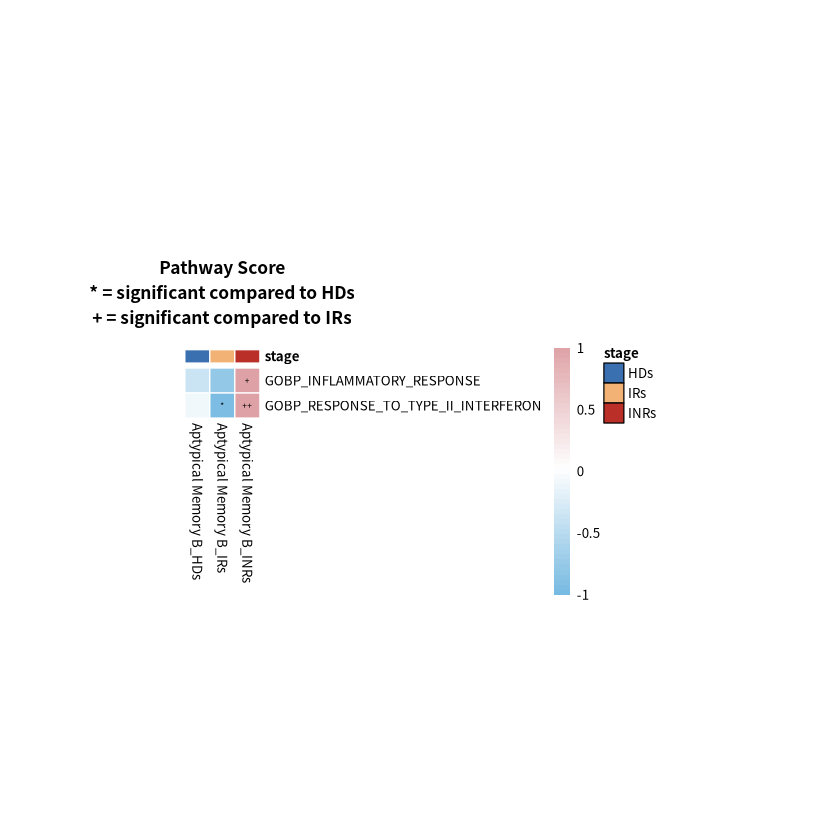

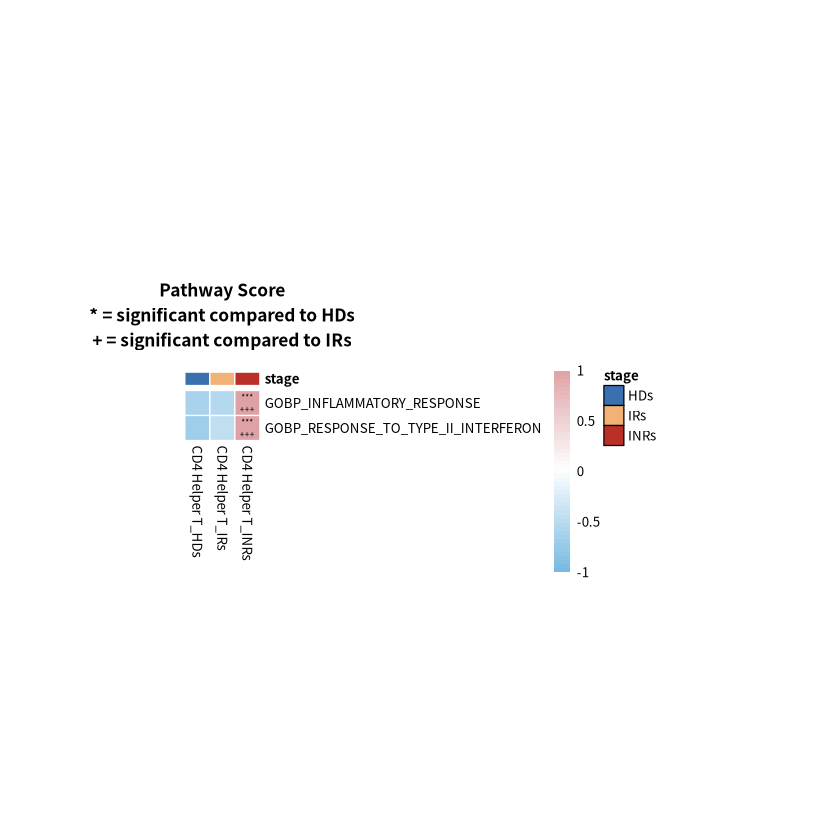

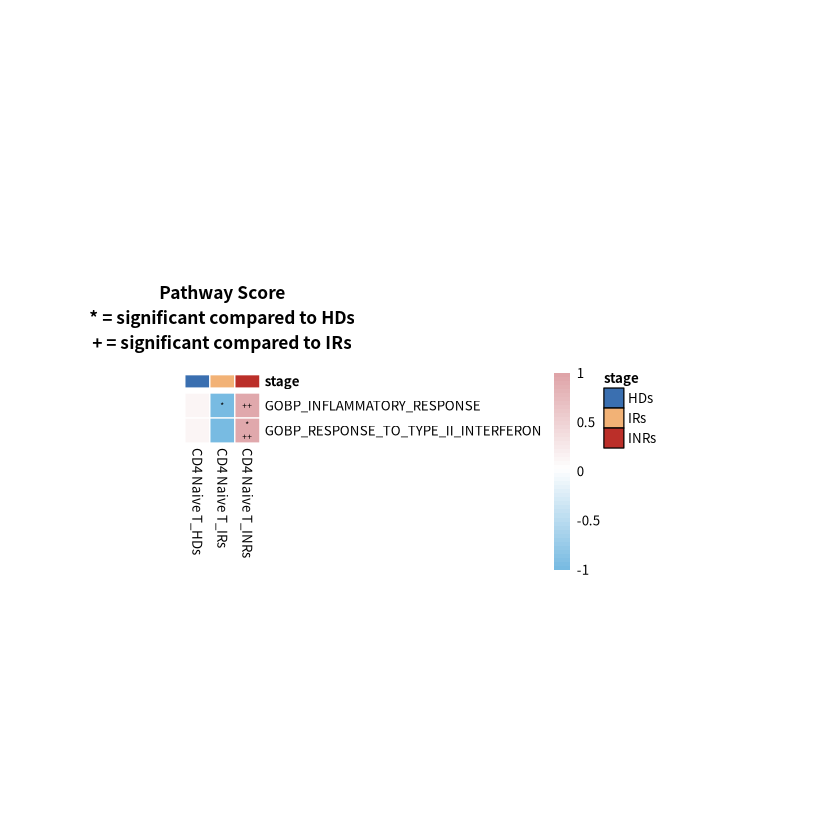

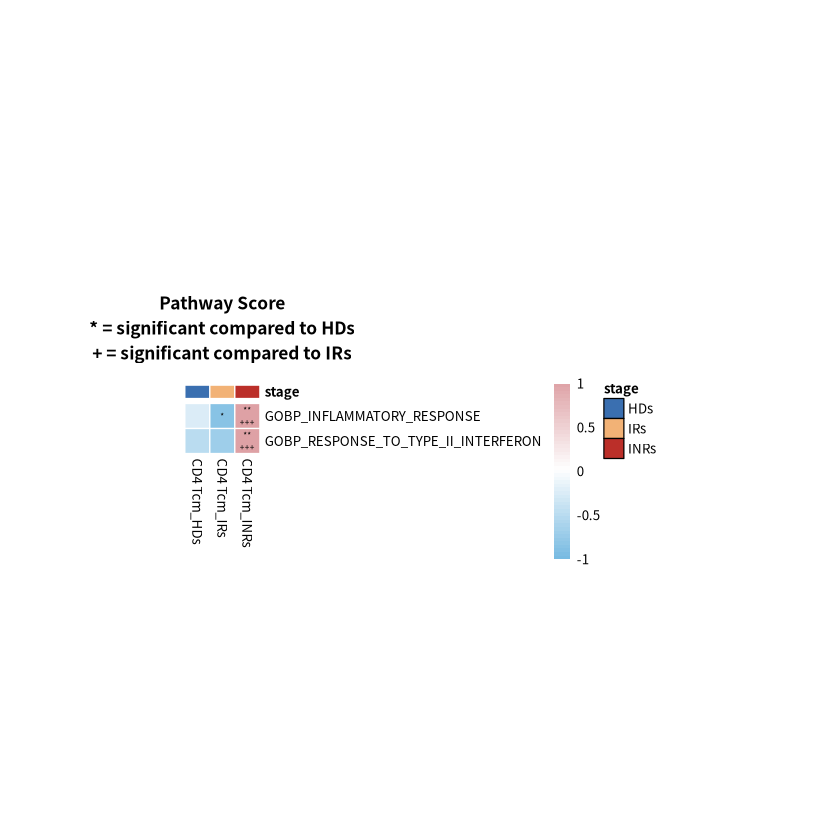

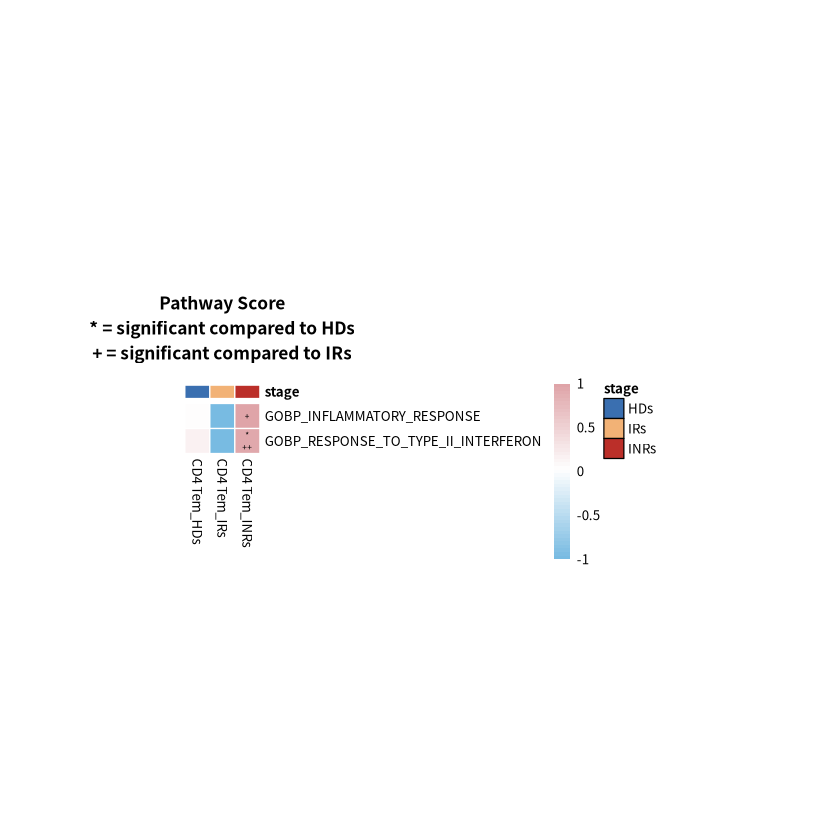

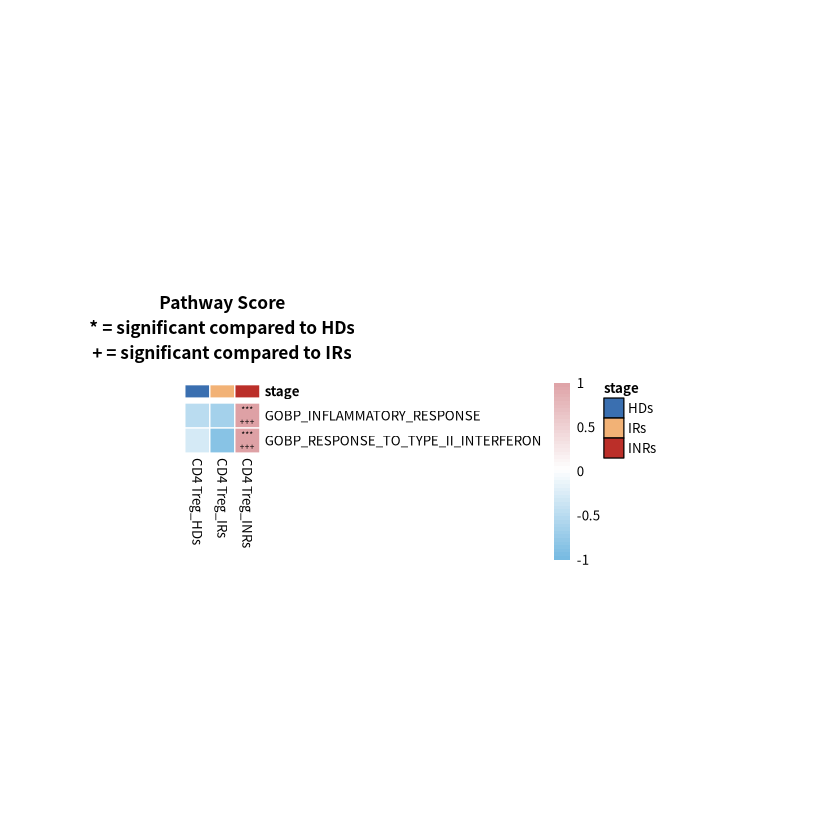

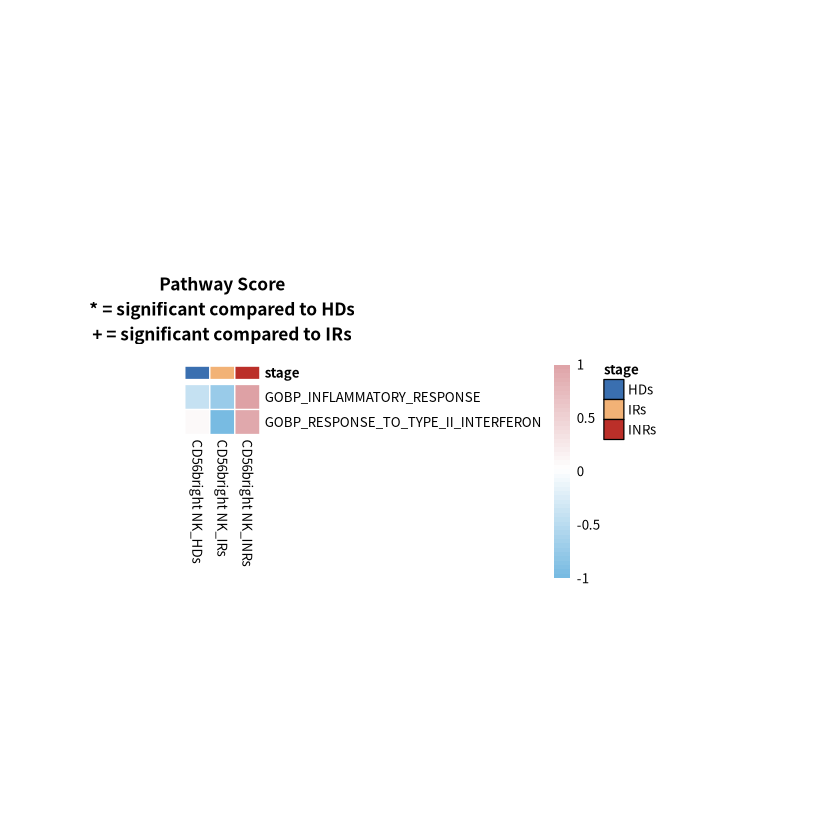

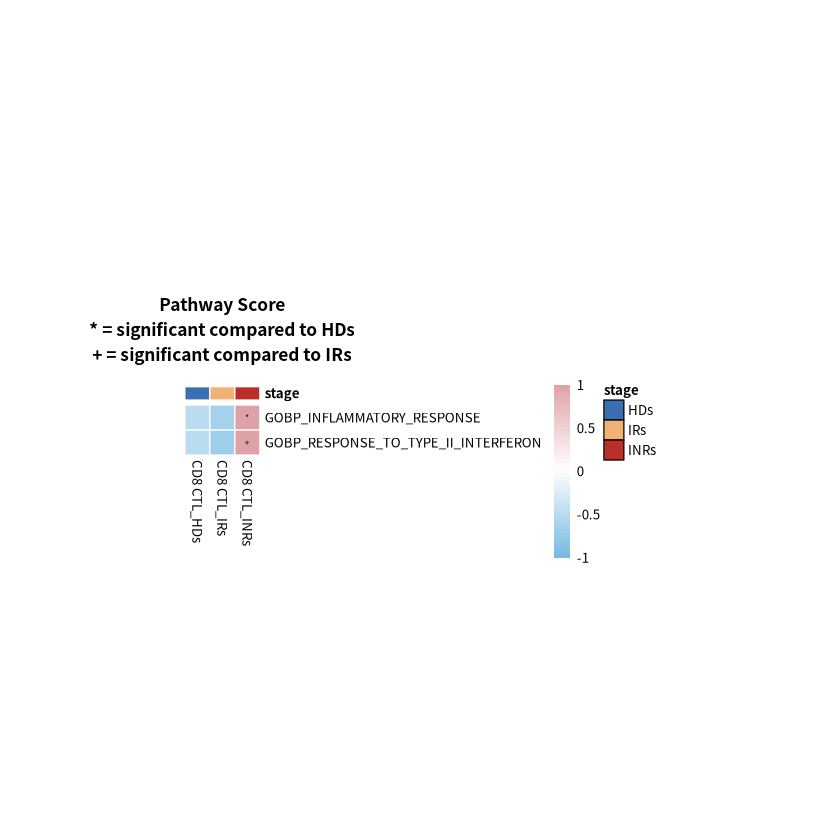

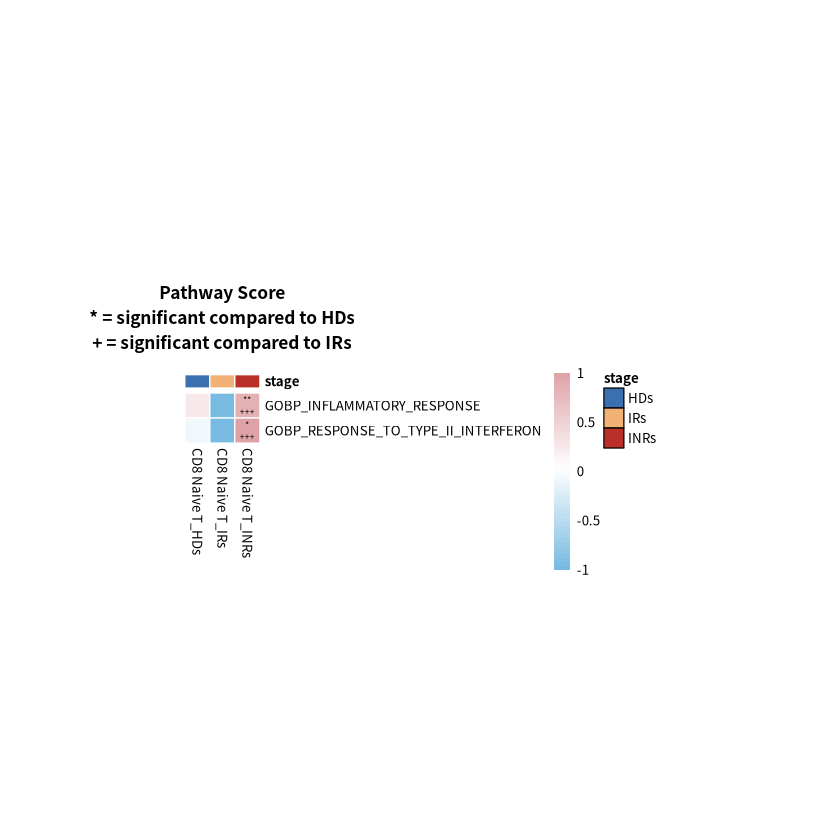

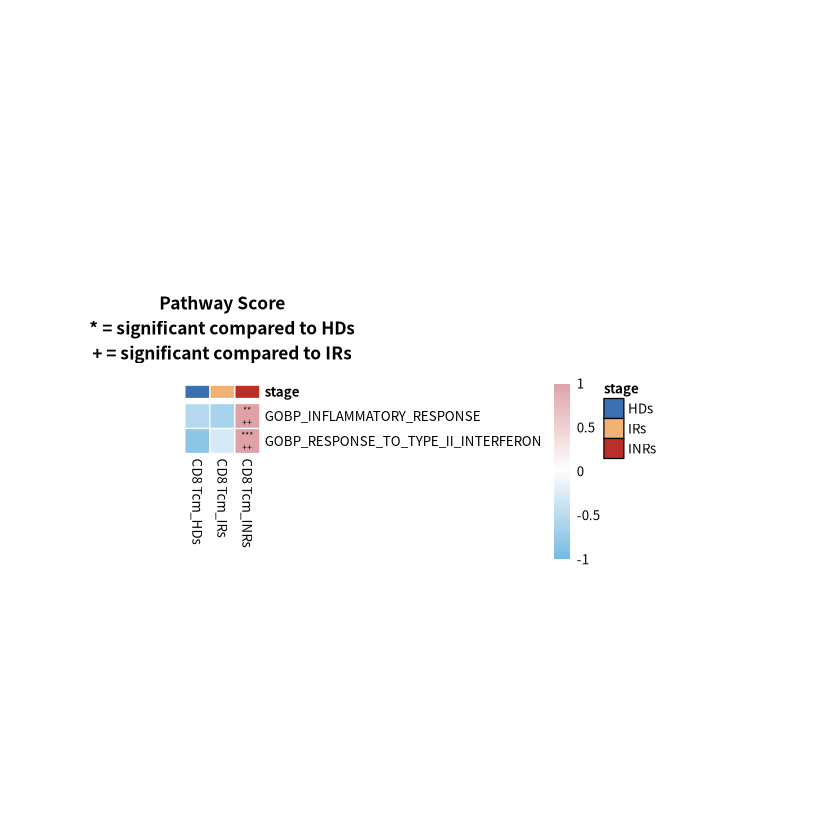

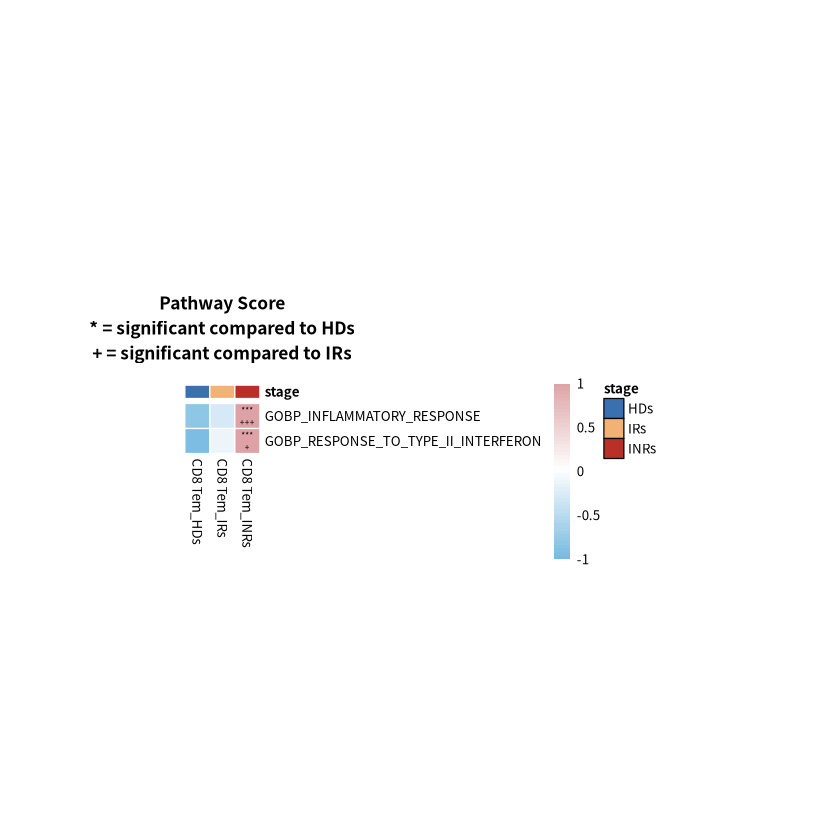

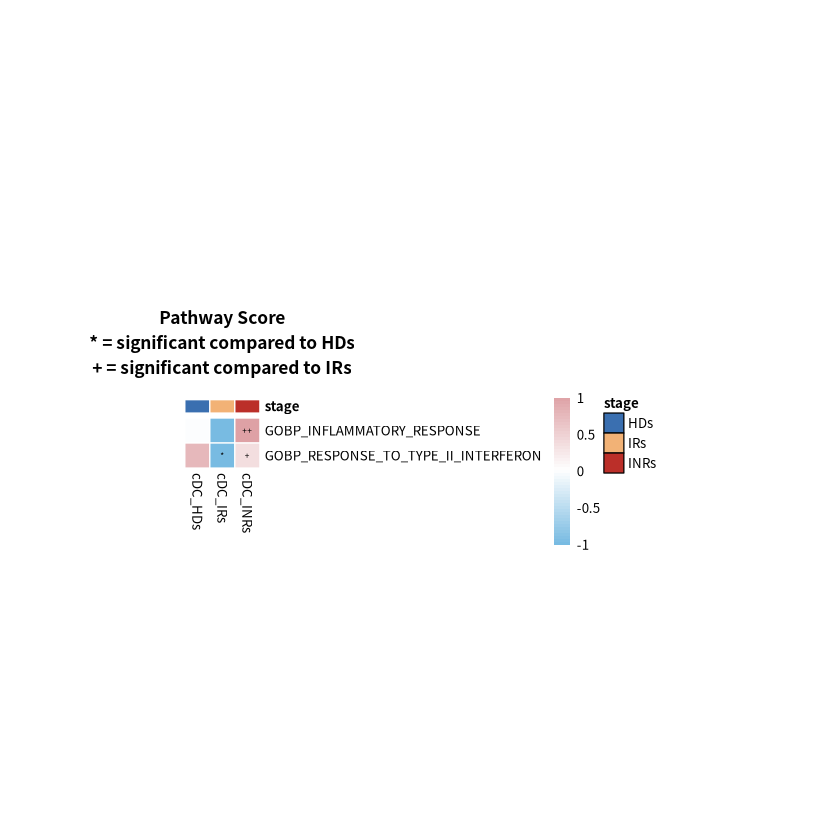

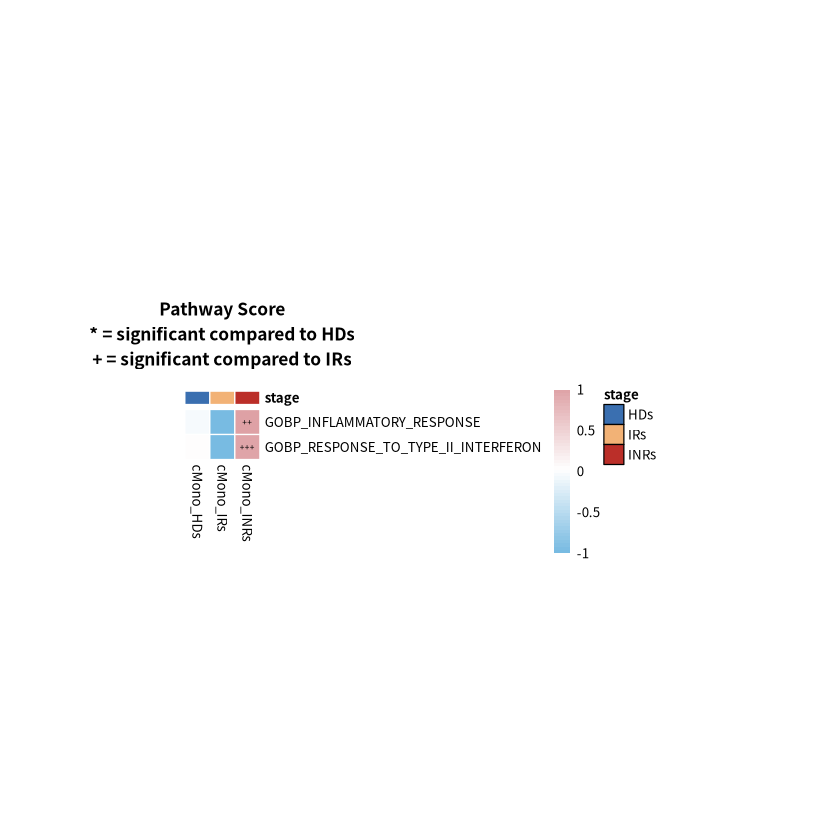

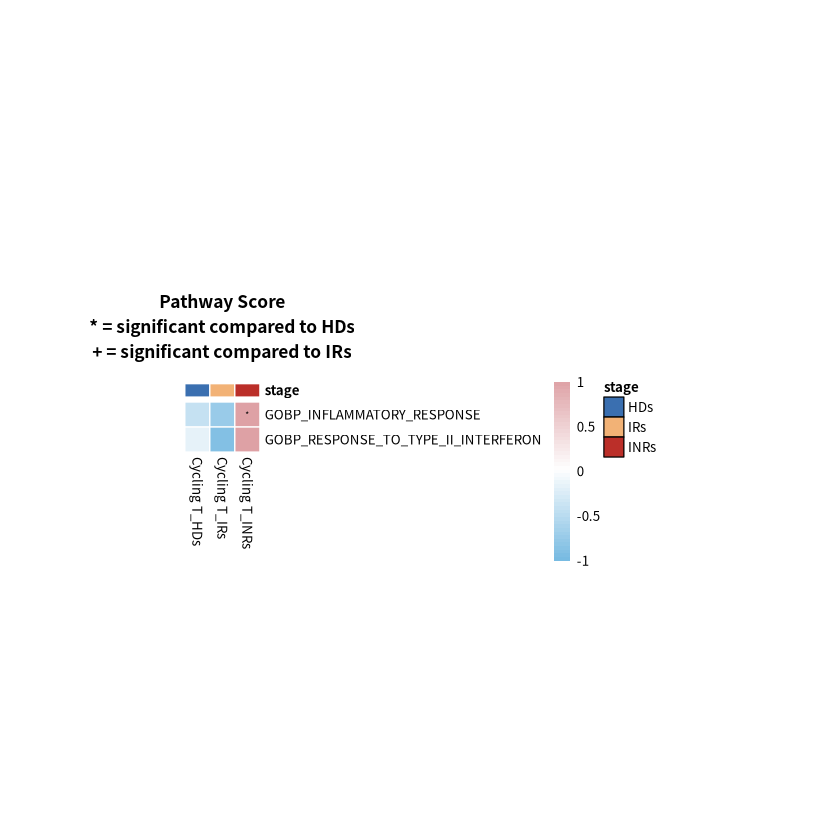

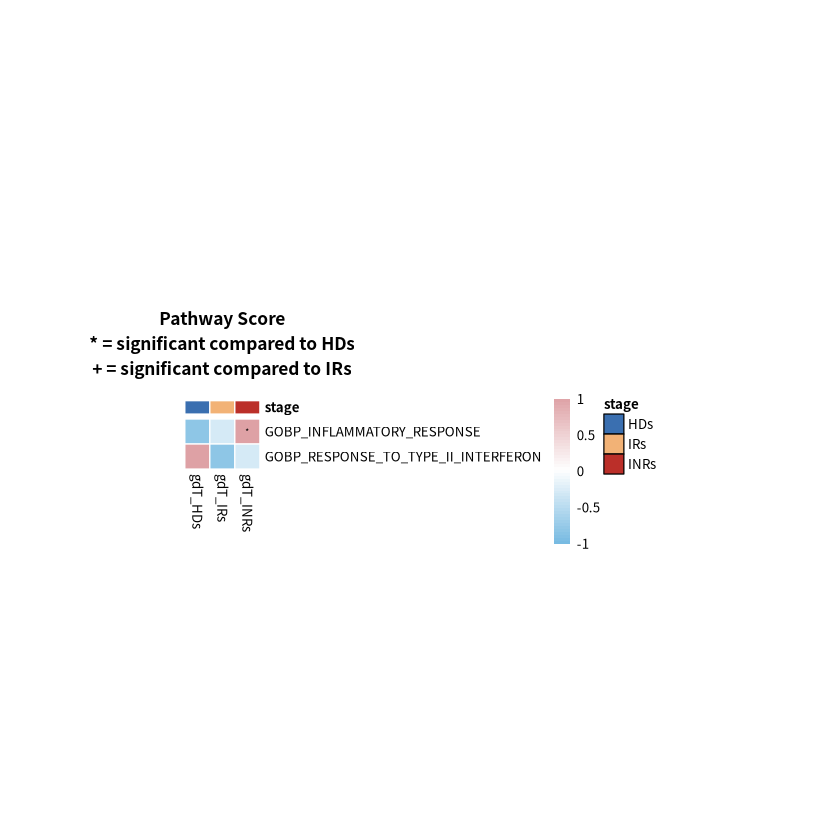

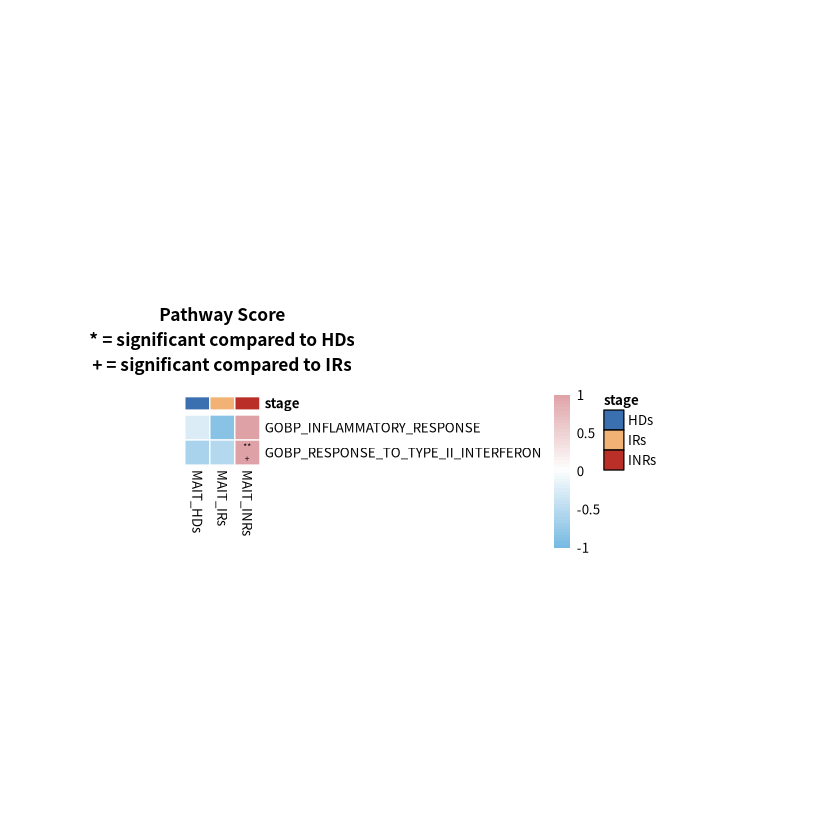

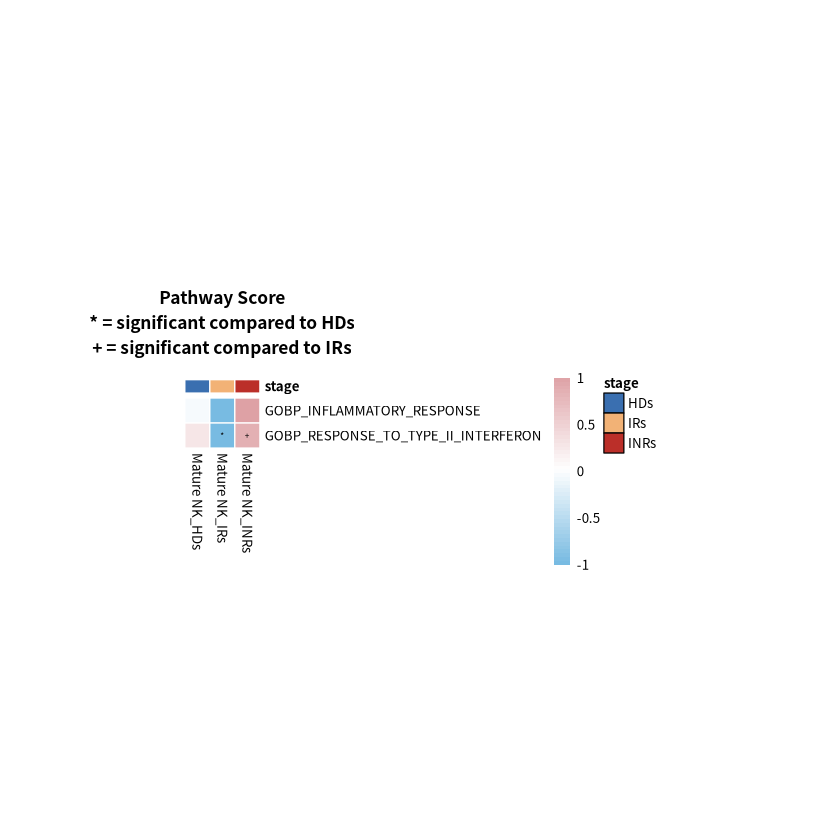

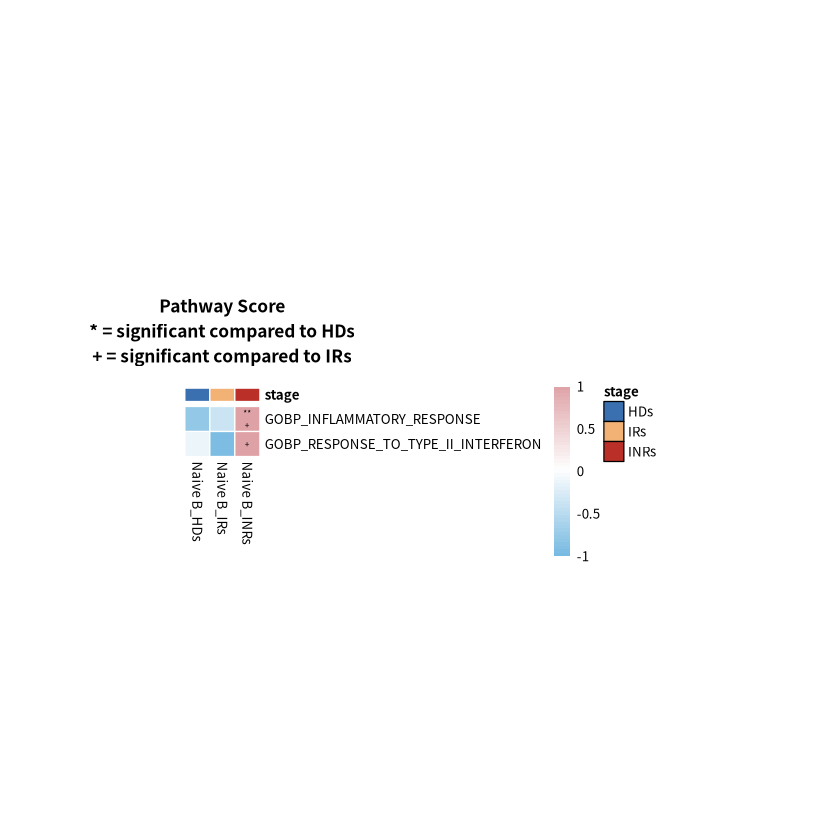

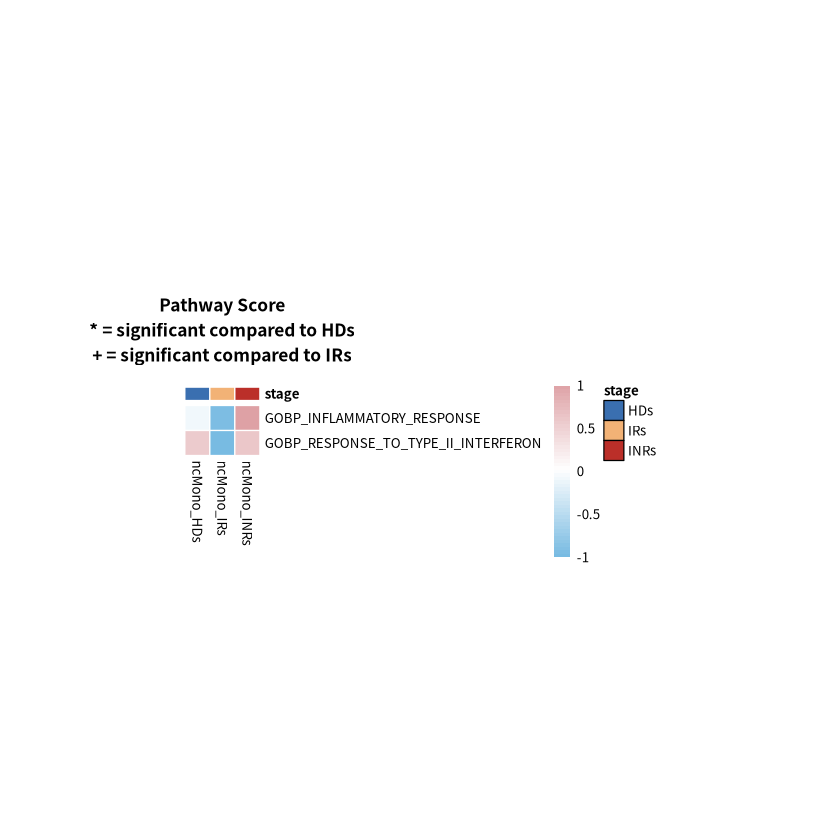

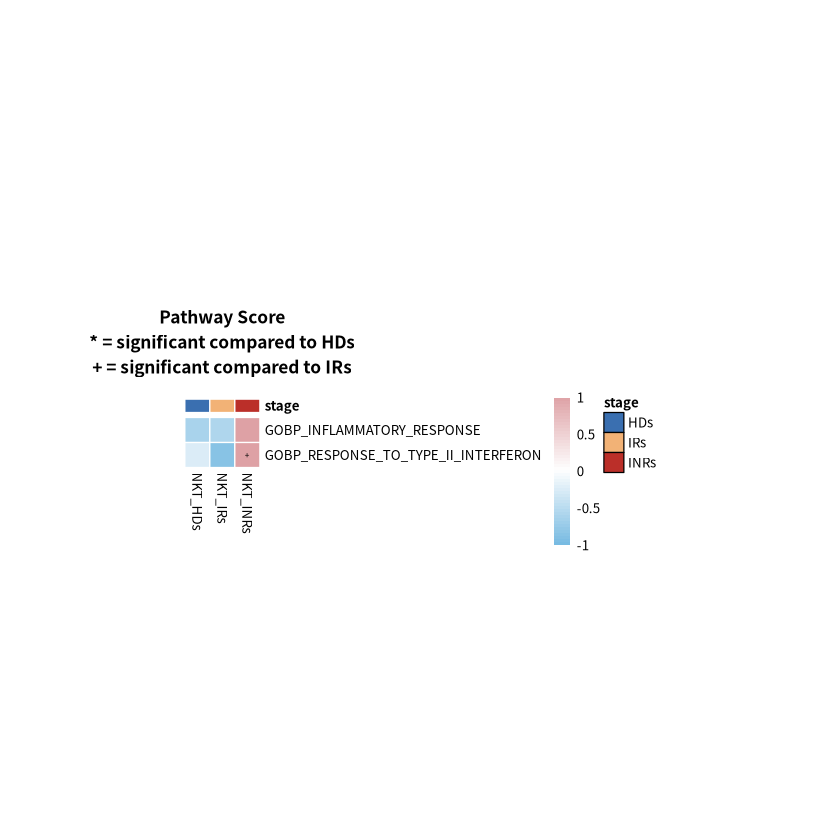

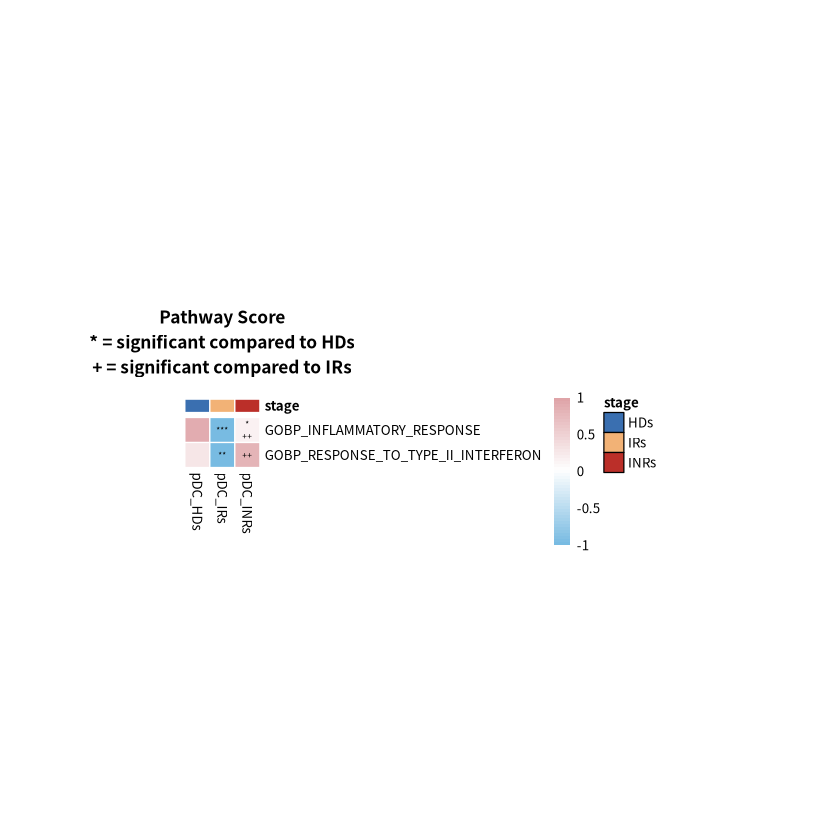

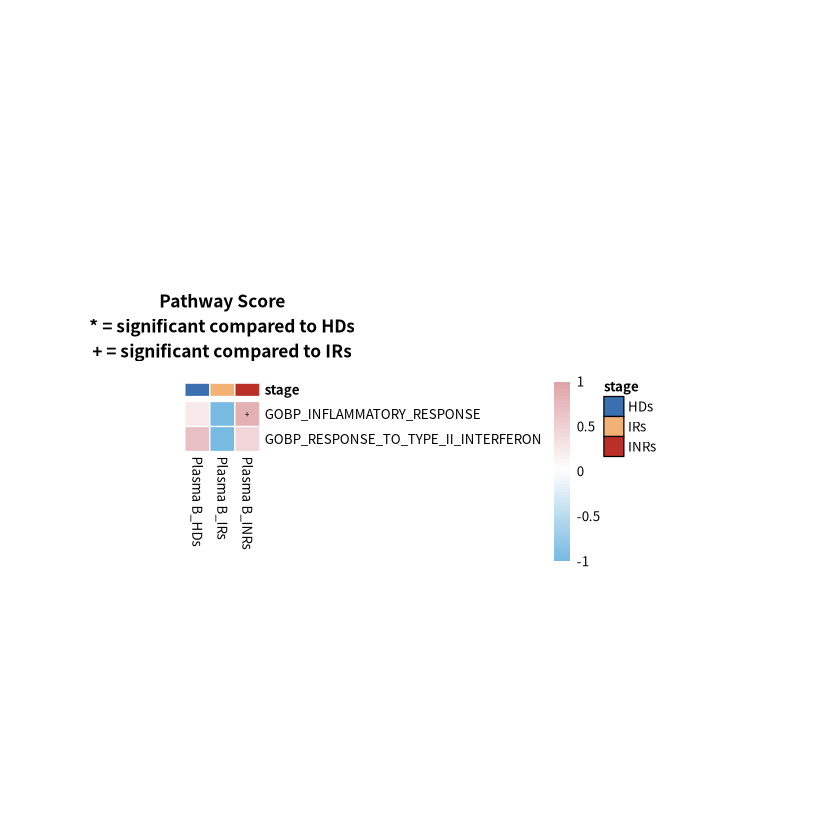

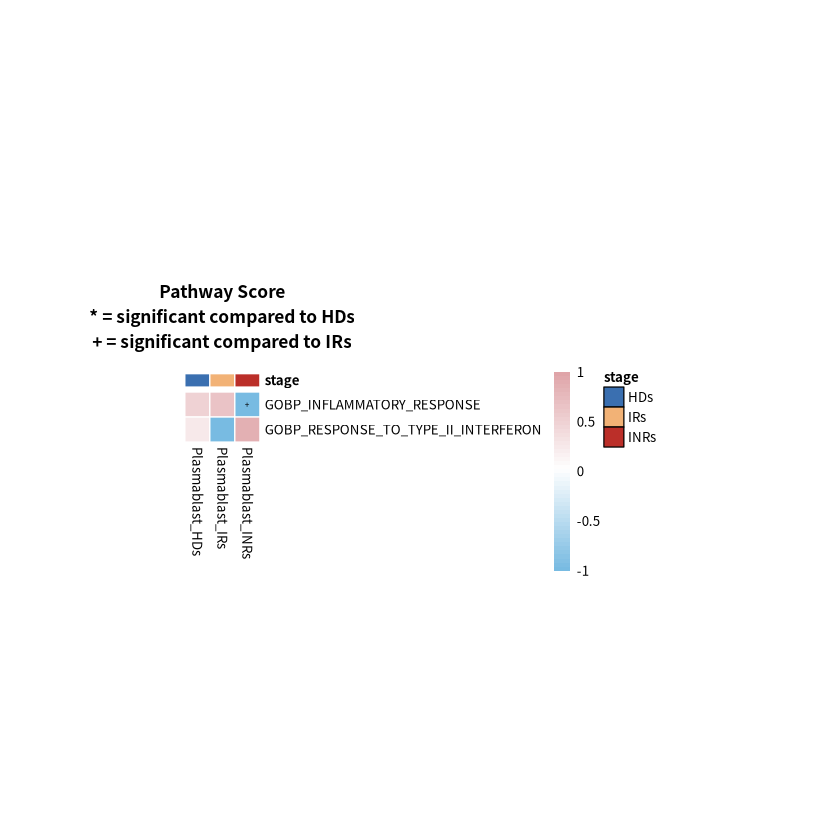

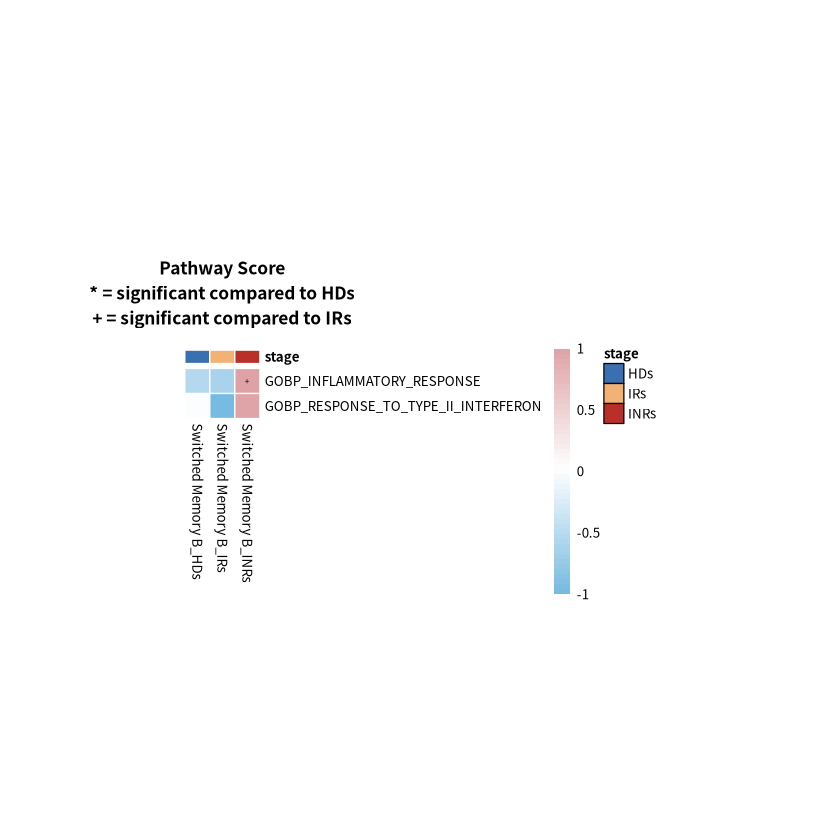

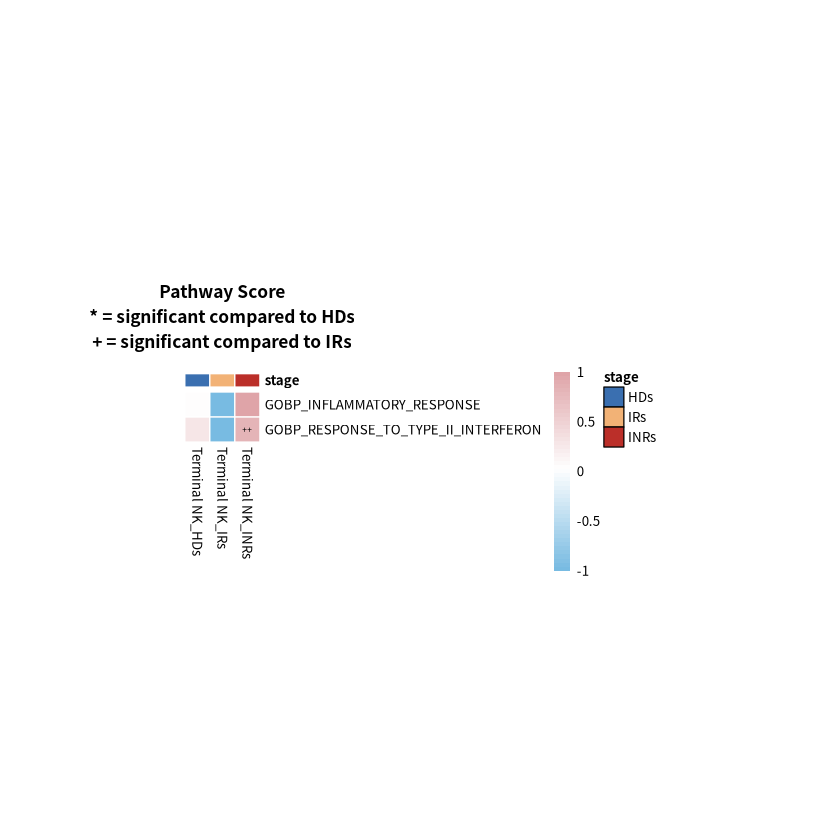

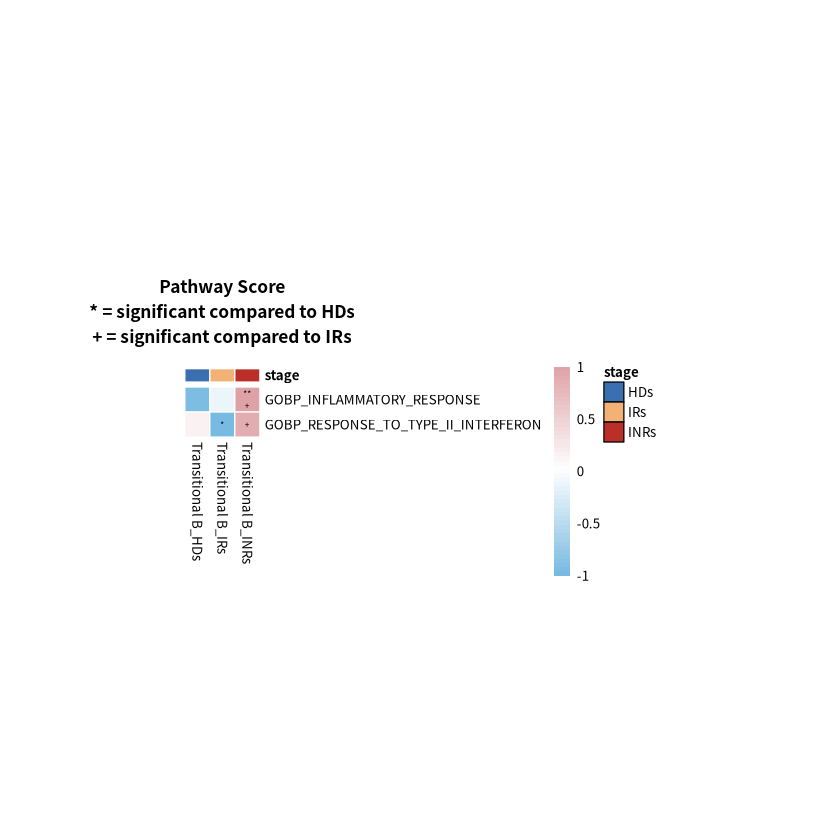

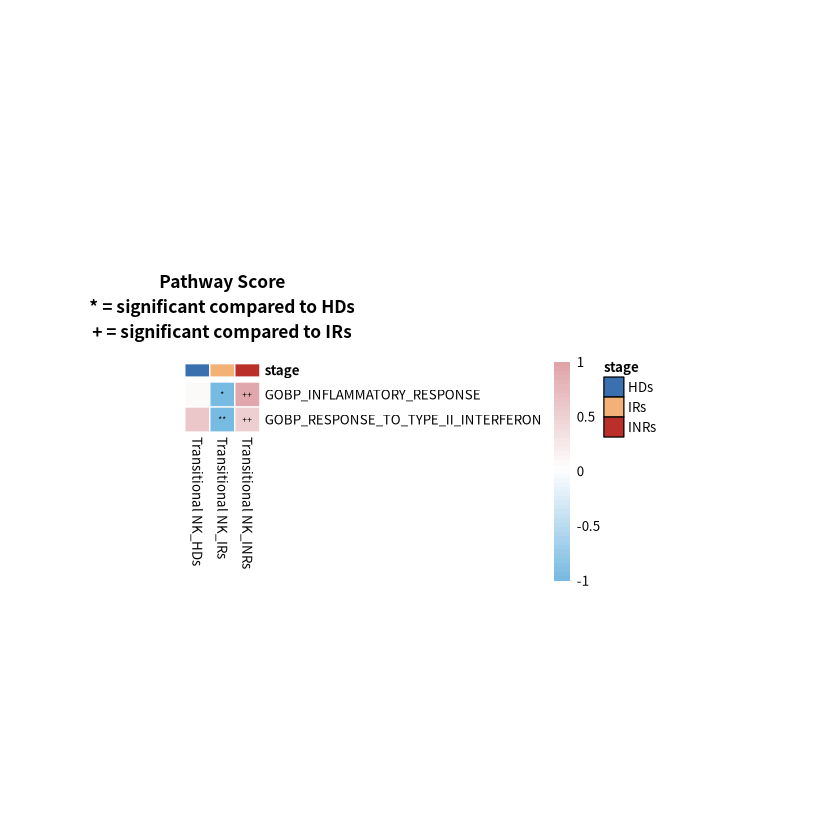

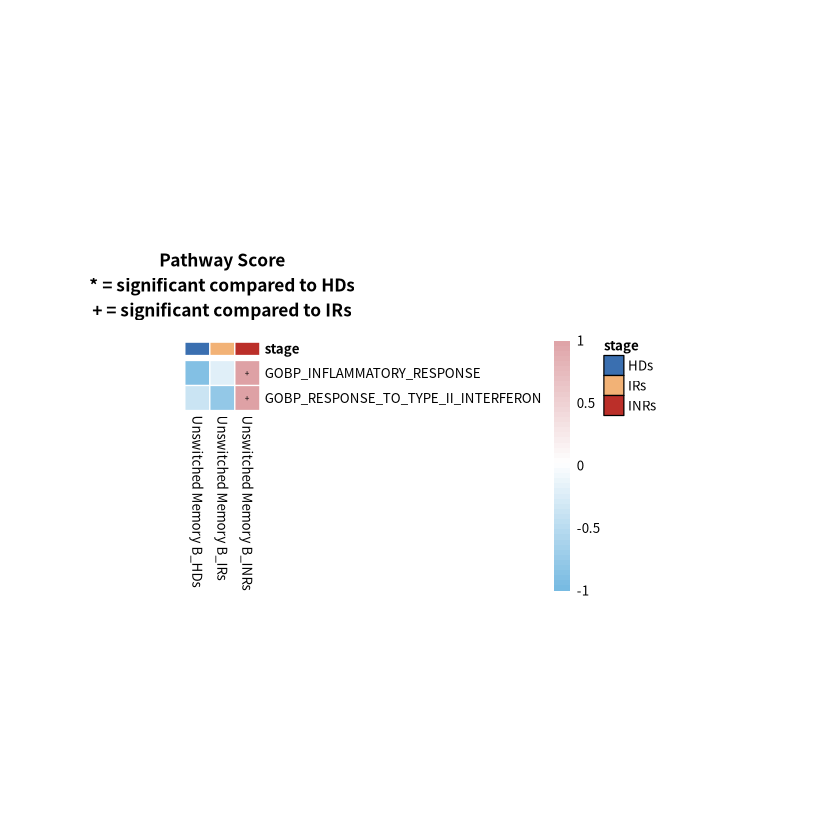

In [28]:
##作图
for (i in 1:(length(colnames(df))/3)){
  a=3*i-2
  b=3*i
  sort_data_sub <- sort_data[,c(a:b)]
  df_sub <- df[,c(a:b)]
  annotation_col = data.frame(
    stage = rep(c("HDs","IRs","INRs"),1),
    row.names = colnames(df_sub))
  ann_colors <- list(stage = c(HDs='#3A6FB0',IRs='#F2B276',INRs='#BB2F29'))
  p <- pheatmap(sort_data_sub,
                 fontsize=8,
                 cluster_cols = F,
                 cluster_rows = F,
                 breaks=seq(-1,1,length.out = 50),
                 display_numbers = df_sub,
                 number_color = "black",
                 fontsize_number = 5,
                #color = colorRampPalette(c("navy", "white", "firebrick3"))(50),
                 color = colorRampPalette(c("#78BBE2","white","#DEA1A5"))(50),
                 fontsize_col = 8,
                 fontsize_row = 8,
                 show_colnames = T,
                 cellwidth = 15, 
                 cellheight = 15,
                 main = "Pathway Score\n* = significant compared to HDs\n+ = significant compared to IRs",
                 annotation_legend	= T,
                 scale="row",
                 annotation_col = annotation_col,
                 annotation_colors = ann_colors,
                 border=T,
                 border_color="white")
  p <- as.ggplot(p)
  name <- colnames(sort_data_sub)[1]
  ggsave(paste0("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/PathwayScore/figure/ALL/",name,".pdf"),p,width=8,height=9)
}

In [23]:
sort_data

,Aptypical Memory B_HDs,Aptypical Memory B_IRs,Aptypical Memory B_INRs,CD4 Helper T_HDs,CD4 Helper T_IRs,CD4 Helper T_INRs,CD4 Naive T_HDs,CD4 Naive T_IRs,CD4 Naive T_INRs,CD4 Tcm_HDs,⋯,Terminal NK_INRs,Transitional B_HDs,Transitional B_IRs,Transitional B_INRs,Transitional NK_HDs,Transitional NK_IRs,Transitional NK_INRs,Unswitched Memory B_HDs,Unswitched Memory B_IRs,Unswitched Memory B_INRs
GOBP_INFLAMMATORY_RESPONSE,0.02188396,0.02120583,0.02433344,0.01669036,0.01685323,0.02181456,-0.01124841,-0.01286458,-0.01008264,0.0001443938,⋯,0.0385551,-0.001907455,0.0008297468,0.004710257,0.05255373,0.04725973,0.05656229,0.00909328,0.01053817,0.01311803
GOBP_RESPONSE_TO_TYPE_II_INTERFERON,0.20526043,0.19949855,0.21301175,0.17152091,0.17379693,0.18946350,0.12459600,0.11945550,0.12792957,0.1401586196,⋯,0.2131137,0.164347793,0.1583761824,0.167754122,0.24474003,0.22939143,0.24401006,0.17547993,0.17402765,0.18130922


### 通路多组柱状图（样本）

In [2]:
mytheme <- theme_prism(base_family="",base_fontface="plain") +
  theme(strip.text = element_text(size = 8,angle=10,vjust = 0.5,hjust = 0.5),
        axis.line = element_line(color = "black",size = 0.2),
        axis.ticks = element_line(size = 0.2),
        axis.text.y = element_text(color = "black",size = 6),
        axis.text.x = element_text(color = "black",size = 6),
        axis.title = element_text(color = "black",size = 10),
        legend.position = "none")

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


In [3]:
data <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/PathwayScore/数据导出/CD8/CD8-1010.csv",check.names = F,header = T))
data$stage <- factor(data$stage,levels = c("HDs",'IRs',"INRs"))

In [4]:
data

sample,stage,celltype_L3,GOBP_CELL_KILLING,GOBP_POSITIVE_REGULATION_OF_CYTOKINE_PRODUCTION,GOBP_POSITIVE_REGULATION_OF_IMMUNE_EFFECTOR_PROCESS,GOBP_POSITIVE_REGULATION_OF_RESPONSE_TO_CYTOKINE_STIMULUS,HALLMARK_APOPTOSIS,HALLMARK_IL2_STAT5_SIGNALING,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_INFLAMMATORY_RESPONSE,HALLMARK_INTERFERON_ALPHA_RESPONSE,HALLMARK_INTERFERON_GAMMA_RESPONSE,HALLMARK_TNFA_SIGNALING_VIA_NFKB,IMMUNE_EFFECTOR_PROCESS,Module_Activation,Module_AP1,Module_Cytotoxic,Module_Exhaustion
<chr>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HD-H134,HDs,CD8_Naive_T-CCR7,0.16725004,0.114059530,0.19176600,0.04483803,0.152298249,0.042846788,-0.023284002,0.020861129,0.31442010,0.25831810,0.068116840,0.067549489,-0.372712289,0.44188298,-0.403364095,-0.324982529
HD-H134,HDs,gdT2-GZMH,0.30182995,0.100628318,0.24880928,0.10407336,0.264629077,0.086309887,0.054294280,0.136405169,0.57259644,0.52286898,0.316449568,0.094715440,0.158362983,0.59611312,0.493719326,-0.008547005
HD-H134,HDs,CD8_Naive_T-CCR7,0.10467665,0.055133648,0.14831450,0.11656600,0.012202590,0.108074239,-0.007165808,0.036297832,0.36384905,0.18521129,0.130377837,-0.011851264,-0.036796374,0.50208049,-0.383251345,-0.205551395
HD-H134,HDs,CD8_Naive_T-CCR7,0.15918598,0.052167542,0.17143896,0.24173623,0.164255965,0.117849293,0.012247307,-0.057741941,0.34214792,0.34622638,0.084299234,0.060391117,-0.221529385,0.19303326,-0.225623625,-0.234485931
HD-H134,HDs,CD8_CTL-GZMK,0.19635028,0.082877471,0.20245497,0.27077037,0.170591855,0.000734066,0.086087507,0.021625540,0.30587833,0.24917781,0.127474563,0.066926926,-0.013118932,0.98140087,-0.178737907,0.468011112
HD-H134,HDs,CD8_Tcm-GZMK,0.19191038,0.105097531,0.17626805,0.09070249,0.172280900,0.082963152,0.059288988,0.133132116,0.32560000,0.22786788,0.123564834,0.076008612,-0.166810906,0.74852363,-0.072294784,-0.194105320
HD-H134,HDs,CD8_Naive_T-CCR7,0.12334265,-0.003150189,0.08131312,0.25728831,0.064579027,0.117777215,0.031869933,-0.122429448,0.34389739,0.19987720,0.074272903,-0.039870008,-0.005969374,0.61607791,-0.096001003,-0.169609890
HD-H134,HDs,CD8_CTL-GZMB,0.38897244,0.081354078,0.22556548,0.14001286,0.242547619,0.106652282,-0.028371555,0.021087662,0.35378737,0.40162968,0.140050286,0.092407739,0.821872040,0.43806353,0.882357000,0.945570363
HD-H134,HDs,NKT-NCR1,0.27519807,0.005420339,0.15136847,0.07819130,0.086294723,0.063653840,0.069122210,-0.125427073,0.23225331,0.17941371,0.062070493,0.001089719,0.158806218,0.49967292,1.148329431,-0.274259529


In [5]:
df_avg <- data %>%
  group_by(sample,stage,celltype_L3) %>%
  summarise(across(everything(), mean))
df_avg

`summarise()` has grouped output by 'sample', 'stage'. You can override using
the `.groups` argument.


sample,stage,celltype_L3,GOBP_CELL_KILLING,GOBP_POSITIVE_REGULATION_OF_CYTOKINE_PRODUCTION,GOBP_POSITIVE_REGULATION_OF_IMMUNE_EFFECTOR_PROCESS,GOBP_POSITIVE_REGULATION_OF_RESPONSE_TO_CYTOKINE_STIMULUS,HALLMARK_APOPTOSIS,HALLMARK_IL2_STAT5_SIGNALING,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_INFLAMMATORY_RESPONSE,HALLMARK_INTERFERON_ALPHA_RESPONSE,HALLMARK_INTERFERON_GAMMA_RESPONSE,HALLMARK_TNFA_SIGNALING_VIA_NFKB,IMMUNE_EFFECTOR_PROCESS,Module_Activation,Module_AP1,Module_Cytotoxic,Module_Exhaustion
<chr>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HD-H134,HDs,CD8_CTL-GZMB,0.3014699,0.11245729,0.2151569,0.10185397,0.1614461,0.09103579,0.08185774,0.04130472,0.3233601,0.3447121,0.11359061,0.11214792,0.1360679906,0.4449854,0.80178747,0.032962102
HD-H134,HDs,CD8_CTL-GZMK,0.2491737,0.08893849,0.1893025,0.08230011,0.1406296,0.06400752,0.06950067,0.05009432,0.2905495,0.3015288,0.12294691,0.08684005,0.1311185255,0.5217274,0.17971411,0.027084838
HD-H134,HDs,CD8_Naive_T-CCR7,0.1571476,0.06725876,0.1359454,0.07328935,0.1088597,0.05144535,0.05681705,0.01157846,0.2479476,0.2266111,0.06265718,0.04510322,-0.1439558554,0.3299579,-0.38928305,-0.262789478
HD-H134,HDs,CD8_Tcm-GPR183,0.1847171,0.08281023,0.1588040,0.08451811,0.1366493,0.06647495,0.06932049,0.02745009,0.2815652,0.2665874,0.08671465,0.06353734,-0.1008862338,0.4049628,-0.28815126,-0.236878096
HD-H134,HDs,CD8_Tcm-GZMK,0.1982585,0.09719987,0.1686520,0.10096636,0.1653246,0.09891241,0.08385210,0.05460724,0.3032893,0.3027529,0.12767545,0.07263627,-0.0361637871,0.5909522,-0.26850953,-0.056618897
HD-H134,HDs,CD8_Tcm-IFI44L,0.2041983,0.11446791,0.1730867,0.15885670,0.1535262,0.08340223,0.11669230,0.07970600,0.7616157,0.5464413,0.10867054,0.07761501,-0.0511719510,0.3567580,-0.34304527,-0.091552988
HD-H134,HDs,CD8_Tem-GZMK,0.2501972,0.10618199,0.1940568,0.11712844,0.1649953,0.08949052,0.07607738,0.04724386,0.3216925,0.3400440,0.13649240,0.09401265,0.1087870721,0.4889741,0.13019098,0.079392968
HD-H134,HDs,Cycling_T-MKI67,0.3011544,0.10105662,0.2223709,0.07283476,0.1837210,0.09581265,0.08068811,0.01868596,0.3378591,0.3274956,0.07077869,0.10674424,0.1432786878,0.3240473,0.49947357,0.099045681
HD-H134,HDs,MAIT-SLC4A10,0.2478576,0.10949468,0.1999735,0.10996660,0.1720915,0.12348156,0.10694795,0.06896375,0.3071224,0.3340180,0.14627560,0.09503367,-0.0696998526,0.4493877,-0.02683341,-0.170226409


In [6]:
df_avg <- subset(df_avg, celltype_L3 %in% c('CD8_Naive_T-CCR7','CD8_Tcm-IFI44L','CD8_Tcm-GZMK','CD8_Tem-GZMK','CD8_CTL-GZMK','CD8_CTL-GZMB','NKT-NCR1'))
df_avg$celltype_L3 <- factor(df_avg$celltype_L3, levels = c('CD8_Naive_T-CCR7','CD8_Tcm-IFI44L','CD8_Tcm-GZMK','CD8_Tem-GZMK','CD8_CTL-GZMK','CD8_CTL-GZMB','NKT-NCR1'))

In [8]:
for (pathway in colnames(df_avg)[4:19]) {
    p <- ggplot(df_avg,aes(x = stage,y = get(pathway))) +
      geom_boxplot(aes(color = stage,fill = stage,alpha= 0.25),position = position_dodge(width = 0.8),outlier.shape = NA) + 
      geom_point(aes(fill = stage),pch = 21,size = 2 ,alpha= 0.75,position = position_jitter(0.2))+
      scale_color_manual(values = c('#3A6FB0','#F2B276','#BB2F29')) + 
      scale_fill_manual(values = c('#3A6FB0','#F2B276','#BB2F29')) + 
      facet_wrap(.~celltype_L3,scales = "free_x",nrow = 1) +
      scale_x_discrete(guide = "prism_bracket") +
      labs(x = NULL,y = paste0(pathway)) + mytheme
    df_p_val <- df_avg %>% group_by(celltype_L3) %>%
      wilcox_test(as.formula(paste0(pathway, " ~ stage"))) %>%
      adjust_pvalue(p.col = "p", method = "BH") %>%
      add_significance(p.col = "p.adj",cutpoints = c(0,0.001, 0.01, 0.05, 1),symbols = c("***", "**", "*", "ns")) %>% 
      add_xy_position(step.increase = 0.08) 
    p2 <- p + stat_pvalue_manual(df_p_val,label = "p.adj.signif",label.size = 4,hide.ns = T,tip.length=0)        
    ggsave(paste0("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/PathwayScore/figure/CD8-1011/",pathway,".pdf"),p2,width=7,height=2)
}

### 通路～年龄相关性

In [2]:
mytheme <- theme_prism(base_family="",base_fontface="plain") +
  theme(strip.text = element_text(size = 8,angle=10,vjust = 0.5,hjust = 0.5),
        axis.line = element_line(color = "black",size = 0.2),
        axis.ticks = element_line(size = 0.2),
        axis.text.y = element_text(color = "black",size = 6),
        axis.text.x = element_text(color = "black",size = 6),
        axis.title = element_text(color = "black",size = 10),
        legend.position = "none")

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


In [3]:
data <- as.data.frame(read.csv("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/PathwayScore/数据导出/Inflammatory_response//ALL_pathscore.csv",check.names = F,header = T))
data$stage <- factor(data$stage,levels = c("HDs",'IRs',"INRs"))
data

sample,stage,INFLAMMATORY_RESPONSE,CHRONIC_INFLAMMATORY_RESPONSE,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_INFLAMMATORY_RESPONSE,HALLMARK_INTERFERON_ALPHA_RESPONSE,HALLMARK_INTERFERON_GAMMA_RESPONSE,HALLMARK_TNFA_SIGNALING_VIA_NFKB,INTERFERON_BETA_PRODUCTION,INTERLEUKIN_10_PRODUCTION,INTERLEUKIN_1_PRODUCTION,INTERLEUKIN_6_PRODUCTION,IP_10_PRODUCTION
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HD-H134,HDs,0.004671429,-0.10010156,-0.030670344,-0.0439540033,0.35085180,0.2332972,0.0661516343,0.315281692,0.15467293,0.037894010,0.135530945,1.43890040
HD-H134,HDs,-0.022479144,-0.19826533,0.013593681,0.0743237465,0.37976688,0.3765135,0.0105685424,-0.066418531,-0.03448520,0.091057963,0.085205796,-0.11342325
HD-H134,HDs,0.074009469,-0.07742862,-0.063613328,0.3689294386,0.13492606,0.3173318,0.0862471507,-0.024479811,0.15396045,0.034835197,0.200576255,0.68843980
HD-H134,HDs,0.023498040,-0.18882084,0.194507355,0.0034123107,0.01311253,0.2009657,0.0507144368,-0.204462189,0.12524366,-0.115884761,0.171015857,-0.33526543
HD-H134,HDs,0.082204273,-0.32655543,0.028861982,0.0752063392,0.34047001,0.3906037,0.0058762917,0.142093106,0.23447177,0.056752009,0.238361492,0.37701367
HD-H134,HDs,0.062947428,-0.03617785,-0.074381634,-0.0206657617,0.27164167,0.2982659,-0.0080305113,-0.146560608,0.03819896,0.057708495,0.201322041,-0.10778991
HD-H134,HDs,0.002349907,0.02432938,0.123057535,0.0748786736,0.32594538,0.3881604,0.0932277759,-0.236854628,0.17234105,0.048554671,0.003236756,-0.19758381
HD-H134,HDs,-0.037939565,-0.15771786,0.112449329,0.0048065124,0.17568246,0.2865078,0.0132460788,-0.017847253,-0.07525206,-0.092020503,0.030462958,-0.07170192
HD-H134,HDs,0.008692344,-0.22007601,0.087217652,0.0500790091,0.54667071,0.3762984,0.1257944109,0.128887688,0.02523864,0.021721307,0.117308014,-0.24658590


In [4]:
df_avg <- data %>%
  group_by(sample,stage) %>%
  summarise(across(everything(), mean))
df_avg

`summarise()` has grouped output by 'sample'. You can override using the
`.groups` argument.


sample,stage,INFLAMMATORY_RESPONSE,CHRONIC_INFLAMMATORY_RESPONSE,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_INFLAMMATORY_RESPONSE,HALLMARK_INTERFERON_ALPHA_RESPONSE,HALLMARK_INTERFERON_GAMMA_RESPONSE,HALLMARK_TNFA_SIGNALING_VIA_NFKB,INTERFERON_BETA_PRODUCTION,INTERLEUKIN_10_PRODUCTION,INTERLEUKIN_1_PRODUCTION,INTERLEUKIN_6_PRODUCTION,IP_10_PRODUCTION
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HD-H134,HDs,0.026708443,-0.013461049,0.07432587,0.04668532,0.2891586,0.2985432,0.11086258,0.06656597,0.06477048,0.09441153,0.10437795,-1.354746e-02
HD-H135,HDs,0.033493132,0.021511235,0.09780368,0.06734334,0.2758180,0.2978858,0.18997725,0.07208064,0.08234069,0.09662895,0.11477809,5.920246e-05
HD-H136,HDs,0.033370716,0.014831619,0.06787001,0.04585809,0.2998967,0.2885772,0.07438727,0.04915590,0.09077934,0.09836781,0.10567026,-2.292522e-02
HD-H137,HDs,0.033856230,-0.027759708,0.06570841,0.04088907,0.3232408,0.3126107,0.08154576,0.05270343,0.09101835,0.09490615,0.10425779,1.350422e-02
HD-H138,HDs,0.032056933,-0.001545349,0.07734156,0.04671675,0.3193591,0.3037820,0.08775883,0.05521066,0.08328699,0.10884469,0.10487291,-2.625158e-03
HD-H140,HDs,0.033748258,0.059982314,0.07786922,0.04938376,0.2989800,0.3048404,0.10846712,0.03952812,0.07730480,0.08940185,0.10231401,-2.185659e-02
HD-H141,HDs,0.030704015,-0.008989797,0.08113591,0.05545892,0.3259270,0.3129368,0.09659687,0.06397051,0.08486078,0.09705283,0.11521410,4.437810e-02
HD-H143,HDs,0.027189168,-0.030803987,0.06026983,0.04242065,0.3293257,0.3208200,0.10055392,0.04311128,0.06237834,0.08071924,0.09498946,-2.123760e-02
HD-H145,HDs,0.025318311,-0.035606682,0.05813693,0.04119834,0.3220928,0.3017440,0.08551804,0.03317273,0.05635259,0.07726591,0.08772789,-5.673669e-02


In [5]:
meta <- read.csv("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/样本统计/sample_information.csv")
meta

sample,sex,age,stage,scRNA,scATAC,WGS,scRNA_cellnumber,scATAC_cellnumber,ART_time,CD4,CD8,CD4.CD8
<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
HD-H134,male,53,HDs,1,1,1,46020,8038,NA,579,319,1.8150470
HD-H135,male,26,HDs,1,1,1,43256,10389,NA,595,754,0.7891247
HD-H136,male,28,HDs,1,1,1,26197,10146,NA,1035,428,2.4182243
HD-H137,male,31,HDs,1,1,1,14338,6431,NA,852,779,1.0937099
HD-H138,male,32,HDs,1,1,1,25807,9235,NA,667,1040,0.6413462
HD-H140,male,28,HDs,1,1,1,19559,7292,NA,908,603,1.5058043
HD-H141,male,29,HDs,1,1,1,18360,6954,NA,1064,445,2.3910112
HD-H143,male,33,HDs,1,1,1,17570,6081,NA,889,1144,0.7770979
HD-H145,male,39,HDs,1,1,1,14954,6963,NA,576,581,0.9913941


In [7]:
tmp2 <- merge(df_avg,meta)
tmp2 <- tmp2[,-c(17:25)]
tmp2

sample,stage,INFLAMMATORY_RESPONSE,CHRONIC_INFLAMMATORY_RESPONSE,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_INFLAMMATORY_RESPONSE,HALLMARK_INTERFERON_ALPHA_RESPONSE,HALLMARK_INTERFERON_GAMMA_RESPONSE,HALLMARK_TNFA_SIGNALING_VIA_NFKB,INTERFERON_BETA_PRODUCTION,INTERLEUKIN_10_PRODUCTION,INTERLEUKIN_1_PRODUCTION,INTERLEUKIN_6_PRODUCTION,IP_10_PRODUCTION,sex,age
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
HD-H134,HDs,0.026708443,-0.013461049,0.07432587,0.04668532,0.2891586,0.2985432,0.11086258,0.06656597,0.06477048,0.09441153,0.10437795,-1.354746e-02,male,53
HD-H135,HDs,0.033493132,0.021511235,0.09780368,0.06734334,0.2758180,0.2978858,0.18997725,0.07208064,0.08234069,0.09662895,0.11477809,5.920246e-05,male,26
HD-H136,HDs,0.033370716,0.014831619,0.06787001,0.04585809,0.2998967,0.2885772,0.07438727,0.04915590,0.09077934,0.09836781,0.10567026,-2.292522e-02,male,28
HD-H137,HDs,0.033856230,-0.027759708,0.06570841,0.04088907,0.3232408,0.3126107,0.08154576,0.05270343,0.09101835,0.09490615,0.10425779,1.350422e-02,male,31
HD-H138,HDs,0.032056933,-0.001545349,0.07734156,0.04671675,0.3193591,0.3037820,0.08775883,0.05521066,0.08328699,0.10884469,0.10487291,-2.625158e-03,male,32
HD-H140,HDs,0.033748258,0.059982314,0.07786922,0.04938376,0.2989800,0.3048404,0.10846712,0.03952812,0.07730480,0.08940185,0.10231401,-2.185659e-02,male,28
HD-H141,HDs,0.030704015,-0.008989797,0.08113591,0.05545892,0.3259270,0.3129368,0.09659687,0.06397051,0.08486078,0.09705283,0.11521410,4.437810e-02,male,29
HD-H143,HDs,0.027189168,-0.030803987,0.06026983,0.04242065,0.3293257,0.3208200,0.10055392,0.04311128,0.06237834,0.08071924,0.09498946,-2.123760e-02,male,33
HD-H145,HDs,0.025318311,-0.035606682,0.05813693,0.04119834,0.3220928,0.3017440,0.08551804,0.03317273,0.05635259,0.07726591,0.08772789,-5.673669e-02,male,39


In [12]:
for (i in 3:14) {
    p <- ggplot(data=tmp2, aes(x=tmp2[,16], y=tmp2[,i])) + 
      geom_point(aes(color=stage),size=2.5,alpha=0.5,position = "jitter")+
      scale_color_manual(values=c('#3A6FB0','#F2B276','#BB2F29')) +
      stat_smooth(method="lm",se=F,aes(color=stage)) +
      stat_cor(data=tmp2, method = "spearman",aes(color=stage)) +
      labs(x = colnames(tmp2[16]), y = colnames(tmp2[i])) + mytheme
    p
    ggsave(paste0("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/PathwayScore/figure/相关性/",colnames(tmp2[i]),"_",colnames(tmp2[16]),".pdf"),p,height = 3.2, width = 3.2)
}

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
